## Part 0.1 Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
import subprocess
import os
import pandas as np
import numpy as np
import proplot as pplt
from matplotlib.lines import Line2D
import pathlib
import pickle
import re
import glob
import shutil
import pandas as pd
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
from scipy import stats
from pprint import pprint
import power_calculations as pc
import global_vars as gv
import grid_points as gp
from radiance import Project

if "win32" in sys.platform:
    module_path = r"C:\Users\Justin\Documents\GitHub\IPV_Workbench"
else:
    module_path = "/Users/jmccarty/Data/221205_ipv_workbench/github/IPV_Workbench"
    import imageio
    import cv2 
    import shading_masks as sm
    from sklearn import metrics
    import skimage as ski
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from scipy.optimize import curve_fit
    from scipy.special import expit  # Numerically stable sigmoid function
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from scipy.optimize import curve_fit
    from scipy.special import expit
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline



sys.path.insert(0, module_path)
import workbench
from workbench.utilities import general, config_utils, temporal, io
from workbench.manage import manage, host
# from workbench.manage import host
from workbench.workflows import workflows
from workbench.simulations import method_iv_solver, method_topology_solver
from workbench.visualize import plots as ipv_plot
from workbench.simulations import method_2phase as rad


# Part 2 Shading Profiles

In [13]:
# because we have restarted our notebook we will reactivate our project by reading in the config path
# place your config path here
config_path = "/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/cactus_framework_study.config"
project_manager = manage.Project(config_path)

# rerun the setup in order to rebuild the entire project object and its attributes
project_manager.project_setup()

# set the analysis period to 1 hour of the year, it does not matter which hour
project_manager.edit_cfg_file("analysis", "analysis_period", "10-11")

# load building
building = host.Host(project_manager)


Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/shared/tmy/base.epw
Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/hosts/B1111/base/geometry/0_cactus_geometry_template.3dm
Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/hosts/B1111/base/geometry/0_cactus_geometry_template.gh
Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/hosts/B1111/base/geometry/1_cactus_panelizer_template.gh
The project is initialized. We have created a base host object named 'B1111'.
You will need to either move or create the geometry and panelizer files into the appropriate directories.
The geometry files should follow the convention defined in the output of the template grasshopper and rhino files.
The pan

## 2.1 Generate Shading Masks

In [15]:
radiance_surface_key = "1111_0"

# irradiance sensor points in a 2D array
sensor_pts_xyz_arr = io.load_grid_file(building.project, radiance_surface_key)[['X', 'Y', 'Z']].values

# overwrite to 1000 W/m2
irradiance_value = 1000
# test_irrad = np.zeros_like(existing_irrad) + irradiance_value

Using a while loop to generate clusters of leaves along branches until coverage target is met.
Ending early. Coverage reached 0.879438362684436
0.879438362684436


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

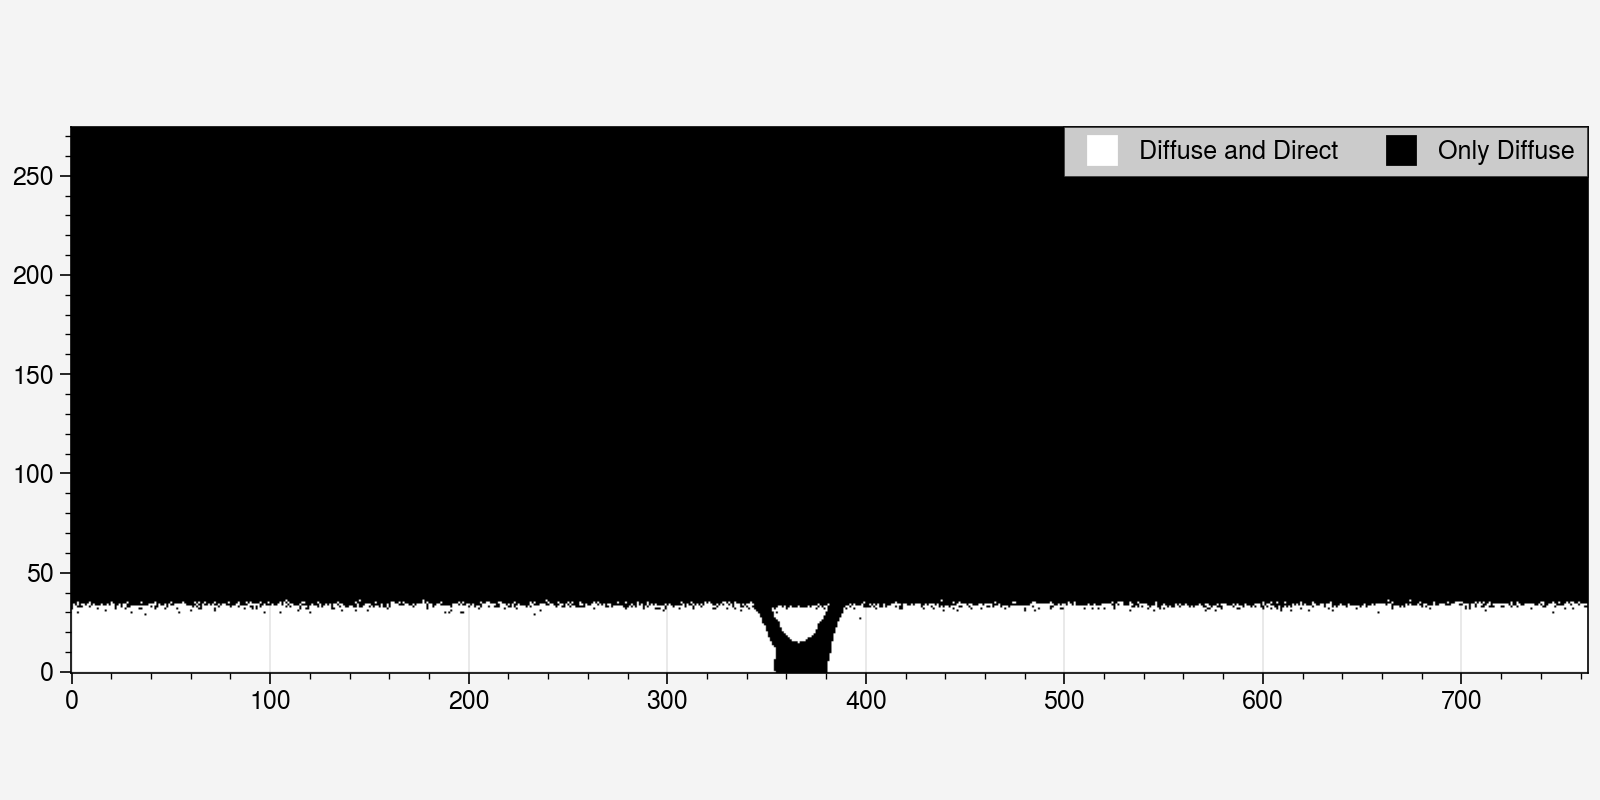

In [43]:
# create a 2D grid based on the points in sensor_pts_xyz_arr
# write functions to generate the masking grids based on this
# mask the direct irradiance values

plot_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, "organic",
                                coverage_factor=0.90)


a, b = plot_arr.shape
print(np.sum(plot_arr) / (a*b))
# plot_arr[0:100, 0:100] = 1


fig, ax = pplt.subplots(figsize=(8,4))
ax.imshow(plot_arr, cmap="gray_r", vmin=0, vmax=1, origin="lower")

all_irrad = Line2D([], [], color='white', marker='s', linestyle='None',
                #    markeredgewidth=0.2, markeredgecolor='grey',
                          markersize=10)
diffuse_irrad = Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=10)

custom_lines = [all_irrad, diffuse_irrad]

ax.legend(custom_lines, ['Diffuse and Direct', 'Only Diffuse'], frameon=True, facecolor='lightgrey')

0.102574964302713

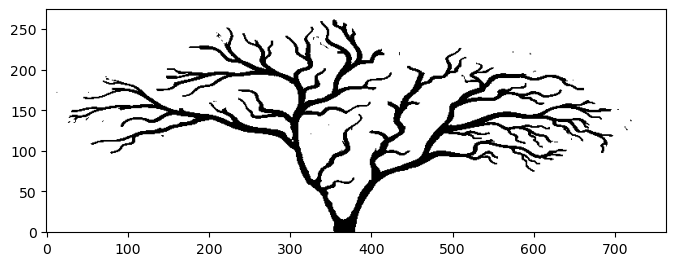

In [577]:

plot_arr = sm.open_image()
# plot_arr = sm.change_tree_blobs(plot_arr, n_clusters=100, coverage_factor=0.25)

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(plot_arr, cmap="gray_r", vmin=0, vmax=1,
          origin="lower")


np.sum(plot_arr) / plot_arr.flatten().shape[0]

Using a while loop to generate clusters of leaves along branches until coverage target is met.


Text(0.5, 1.0, 'Tree Cover 26%')

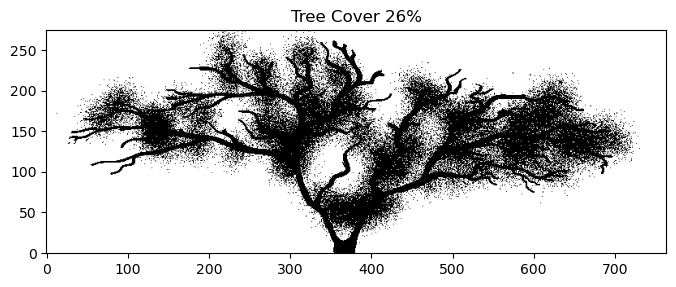

In [756]:
tree_array = sm.make_tree_mask(coverage_factor = 0.25, 
                               n_clusters = 50000, 
                               cluster_spread = 10)

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(tree_array, cmap="gray_r", vmin=0, vmax=1,
        origin="lower")

tree_coverage = int(round(np.sum(tree_array) / tree_array.flatten().shape[0],3)*100)
title = str("Tree Cover "+str(tree_coverage)+"%")
ax.set_title(title)
# plt.savefig(f"tree_anim/tree_cover_{tree_coverage}.png")
# plt.clf()

## 2.2 Save Masks as images

In [1]:
np.arange(0,1.01,0.1)

NameError: name 'np' is not defined

In [71]:
# create a 2D grid based on the points in sensor_pts_xyz_arr
# write functions to generate the masking grids based on this
# mask the direct irradiance values
for shape in ["mask_rows", "mask_columns", "rectangle", "triangle", "circle", "ellipse", "random_squares_small", "random_squares_large", "organic"]:
    print(shape)
    for coverage in np.arange(0,1.01,0.1):
        
        if coverage==0:
            continue
        if coverage==1:
            continue
        print(" ",coverage)
        coverage_name = f"{coverage:0.2f}".split(".")[-1]
        fname = f"mask_{shape}_{coverage_name}.jpg"
        fpath = os.path.join("/Users/jmccarty/Nextcloud/Projects/17_framework/notebooks/masks",fname)
        if os.path.exists(fpath):
            continue
        plot_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, shape,
                                        coverage_factor=coverage)


        a, b = plot_arr.shape
        # print(np.sum(plot_arr) / (a*b))
        # plot_arr[0:100, 0:100] = 1


        fig, ax = plt.subplots(figsize=(8,4))
        ax.imshow(plot_arr, cmap="gray_r", vmin=0, vmax=1, origin="lower")

        all_irrad = Line2D([], [], color='white', marker='s', linestyle='None',
                        #    markeredgewidth=0.2, markeredgecolor='grey',
                                markersize=10)
        diffuse_irrad = Line2D([], [], color='black', marker='s', linestyle='None',
                                markersize=10)

        custom_lines = [all_irrad, diffuse_irrad]

        # ax.legend(custom_lines, ['Diffuse and Direct', 'Only Diffuse'], frameon=True, facecolor='lightgrey')
        ax.axis('off')
        # ax.get_xaxis().set_ticks([])
        # ax.get_yaxis().set_ticks([])
        plt.tight_layout()

        fig.savefig(fpath)
        plt.clf()

mask_rows
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
mask_columns
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
rectangle
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
triangle
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
circle
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
ellipse
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
random_squares_small
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
random_squares_large
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
organic
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8

<Figure size 800x400 with 0 Axes>

# Part 3 Grids

## 3.1 A1 Surface Center Point

In [131]:
# irradiance sensor points in a 2D array
radiance_surface_key = "1111_0"
sensor_pts_xyz_arr = io.load_grid_file(building.project, radiance_surface_key)[['X', 'Y', 'Z']].values

# build grid point
surface_center_pt_xyz_arr = gp.a1_grid_points(sensor_pts_xyz_arr)

# calculate surface area per sensor point
sa_per_pt = gv.SURFACE_AREA / surface_center_pt_xyz_arr.shape[0]

In [50]:
# load irradiance data
global_irrad_ts = pd.read_feather("/Users/jmccarty/Nextcloud/Projects/17_framework/notebooks/synthetic_irradiance.lz4")
global_irrad_arr = global_irrad_ts.iloc[11].to_numpy()

In [63]:
# split irradiance data into components based on the ratio
# this was done this way in case we decided to alter the method to
# calculate masked and effective irradiance independently
ratio_direct_to_diffuse = 0.65 # direct makes up n% of the global
G_eff_direct = global_irrad_arr * ratio_direct_to_diffuse
G_eff_diffuse = global_irrad_arr - G_eff_direct

In [68]:
# mask the direct using a mask array
mask_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, 
                                            "triangle", 
                                            coverage_factor=0.90).flatten()
G_eff_direct_masked = np.where(mask_arr==1, 0, G_eff_direct)

# reconstitute the effective irradiance
G_eff_global = G_eff_diffuse + G_eff_direct_masked

Size not achieved. Making new polygon iteratively.


In [94]:
# gather irradiance from the masked array
G_eff = general.collect_raw_irradiance(surface_center_pt_xyz_arr, sensor_pts_xyz_arr, G_eff_global)

# maintain a constant cell temperature for these experiments
T_cell = 25

# extract peak power from one of the module parameter lists
surface = building.get_surfaces()[0]
module = building.get_modules(surface)[0]
module_params = building.get_dict_instance([surface,module])['Parameters']
peak_power = module_params['performance_power_W_ref']

# extract the gamma value for the module 
gamma_ref = module_params['performance_temp_coe_gamma_pctC']


In [128]:
# calculate power of a single module
power = np.vectorize(pc.pv_watts_method)(G_eff, T_cell, peak_power, gamma_ref, I_misc=0)

# divide that by the area of the module to get normalised power at the point(s)
power_norm = power / module_params['param_actual_module_area_m2']

# multiply this normalised production per point by the surface_area associated to each pt
# in order to calculate power potential of entire surface
surface_power = np.sum(power_norm * sa_per_pt)

## 3.2 A2 Structured Grid Low Density

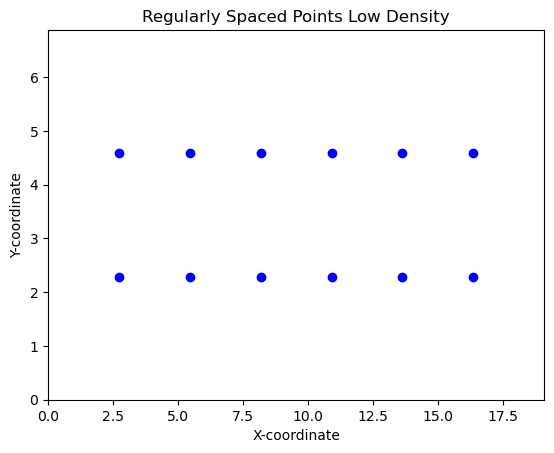

In [251]:
# irradiance sensor points in a 2D array
radiance_surface_key = "1111_0"
sensor_pts_xyz_arr = io.load_grid_file(building.project, radiance_surface_key)[['X', 'Y', 'Z']].values

# build grid point
a2_grid_points_pt_xyz_arr = gp.a2_grid_points_count(sensor_pts_xyz_arr, 6, 2)

# calculate surface area per sensor point
sa_per_pt = gv.SURFACE_AREA / a2_grid_points_pt_xyz_arr.shape[0]

plt.scatter(a2_grid_points_pt_xyz_arr[:,0], a2_grid_points_pt_xyz_arr[:,2], marker='o', color='blue')
plt.xlim(0,19.1)
plt.ylim(0,6.875)
plt.title('Regularly Spaced Points Low Density')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

In [253]:
G_eff = general.collect_raw_irradiance(a2_grid_points_pt_xyz_arr, sensor_pts_xyz_arr, G_eff_global)



array([350., 350., 350., 350., 350., 350., 350., 350., 350., 350., 350.,
       350.])

## 3.3 A3 Structured Grid High Density

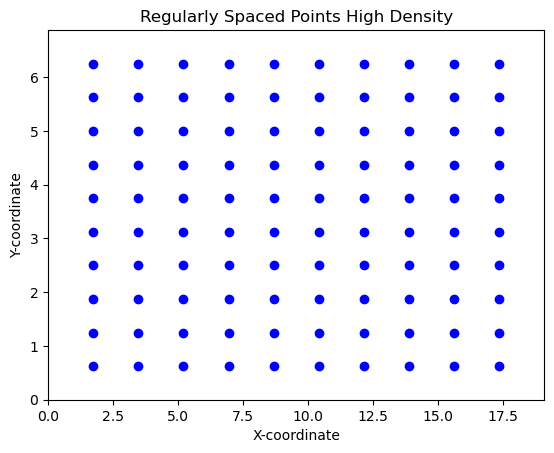

In [230]:
# irradiance sensor points in a 2D array
radiance_surface_key = "1111_0"
sensor_pts_xyz_arr = io.load_grid_file(building.project, radiance_surface_key)[['X', 'Y', 'Z']].values

# build grid point
a2_grid_points_pt_xyz_arr = gp.a2_grid_points_count(sensor_pts_xyz_arr, 10, 10)

# calculate surface area per sensor point
sa_per_pt = gv.SURFACE_AREA / a2_grid_points_pt_xyz_arr.shape[0]

plt.scatter(a2_grid_points_pt_xyz_arr[:,0], a2_grid_points_pt_xyz_arr[:,2], marker='o', color='blue')
plt.xlim(0,19.1)
plt.ylim(0,6.875)
plt.title('Regularly Spaced Points High Density')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

## 3.4 A4 Unstructred Grid

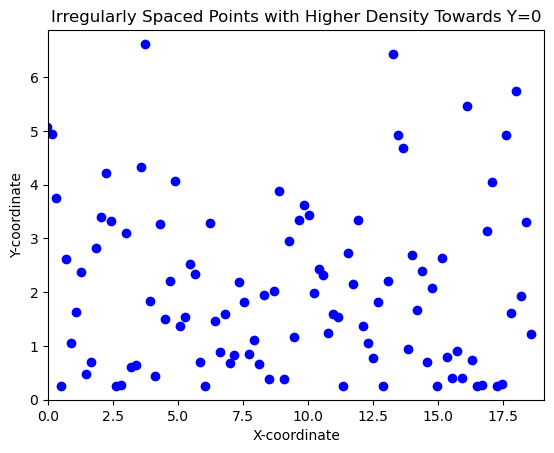

In [284]:
plot_arr = gp.a4_grid_points(sensor_pts_xyz_arr, num_points=100, 
                             lambda_param=0.45, seed=42)

# Create a scatter plot to visualize the points
plt.scatter(plot_arr[:,0], plot_arr[:,2], marker='o', color='blue')
plt.title('Irregularly Spaced Points with Higher Density Towards Y=0')
plt.xlim(0,19.1)
plt.ylim(0,6.875)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

## 3.5 B1 Module Center Point

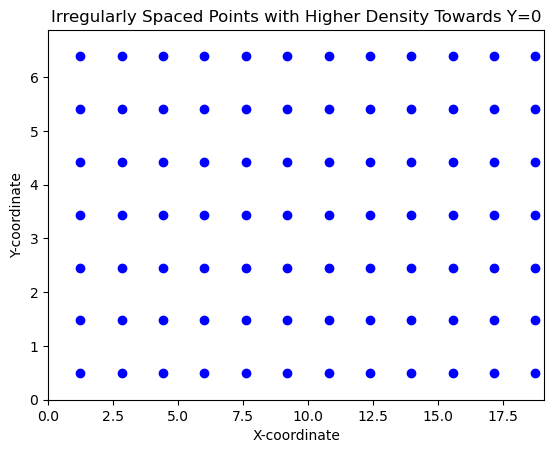

In [279]:

plot_arr = gp.b1_grid_points(building, "{1111;0}")
# Create a scatter plot to visualize the points
plt.scatter(plot_arr[:,0], plot_arr[:,2], marker='o', color='blue')
plt.title('Irregularly Spaced Points with Higher Density Towards Y=0')
plt.xlim(0,19.1)
plt.ylim(0,6.875)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

## 3.6 B2 Module Cell Centers

In [285]:
r = "1111_0"
r.replace("_",";")

'1111;0'

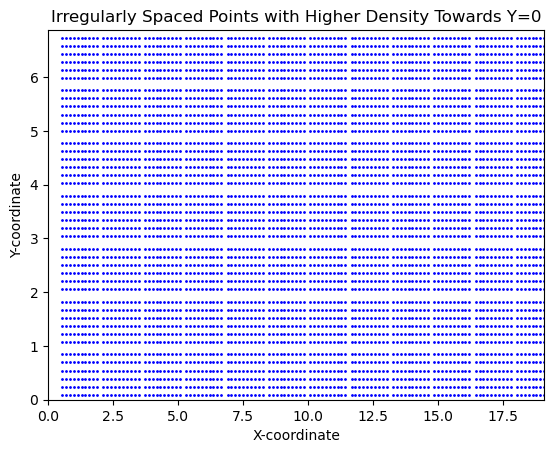

In [281]:

plot_arr = gp.b2_grid_points(building, "{1111;0}")
# Create a scatter plot to visualize the points
plt.scatter(plot_arr[:,0], plot_arr[:,2], marker='o', s=1, color='blue')
plt.title('Irregularly Spaced Points with Higher Density Towards Y=0')
plt.xlim(0,19.1)
plt.ylim(0,6.875)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()

# Part 4 Diffuse/Total Ratio OLD

In [3]:
ratio_results_fp = "/Users/jmccarty/Nextcloud/Projects/17_framework/grasshopper/shading_mask_ratios_clean.csv"

result_data = pd.read_csv(ratio_results_fp,header=None)

masks = result_data[0].unique().tolist()


mask_dict = {}
for mask in masks:
    mask_dict[mask] = {}
    mask_data = result_data[result_data[0]==mask][[1,2]]
    for coverage in [10,30,50,70,90]:
        mask_dict[mask][coverage] = mask_data[mask_data[1]==coverage][2].values[0]

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

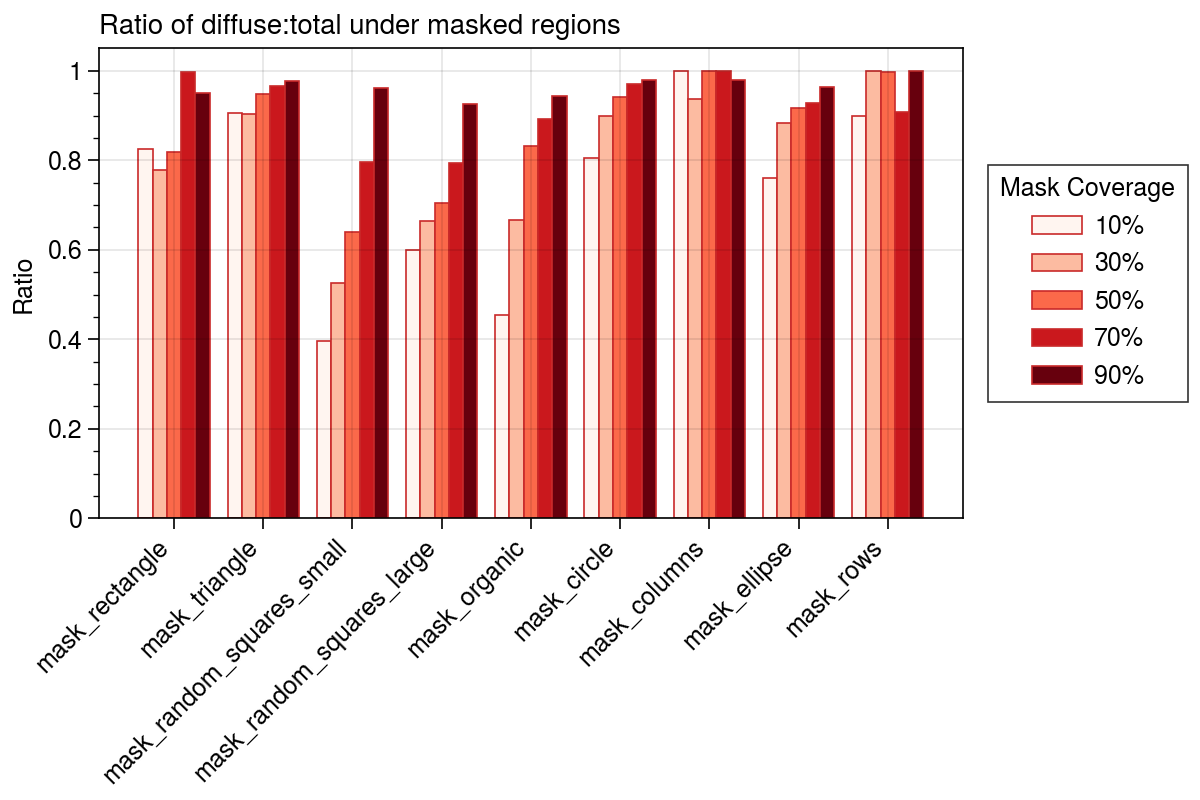

In [4]:

fig, axe = pplt.subplots(ncols=1,nrows=1,facecolor="white",figsize=(6,4))
plot_data = pd.DataFrame(mask_dict).transpose()
plot_data = plot_data.rename(columns=dict(zip(plot_data.columns,[str(c)+"%" for c in plot_data.columns])))
ax = axe[0]

ax.bar(plot_data,
       cycle='Reds', edgecolor='red9')

ax.format(xrotation=45,ylabel="Ratio",
          ltitle="Ratio of diffuse:total under masked regions")
fig.legend(loc='right', title="Mask Coverage", ncols=1)

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

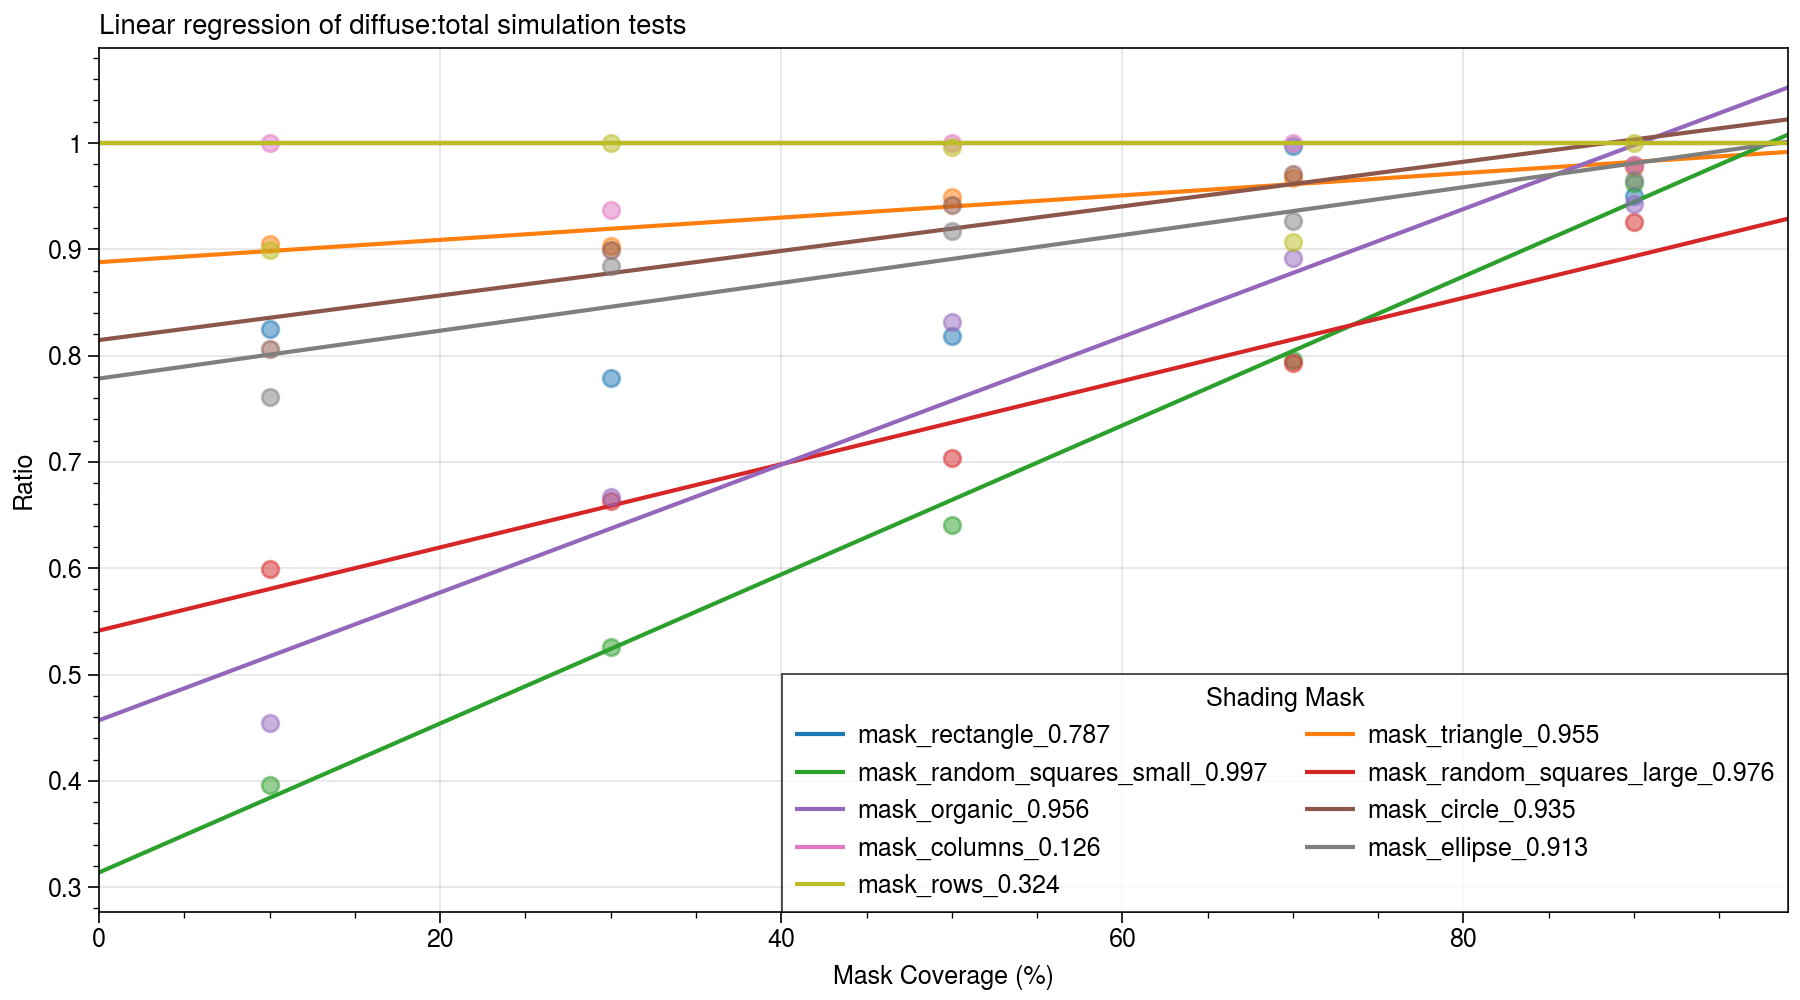

In [106]:
df = pd.DataFrame(mask_dict).transpose()


fig, axe = pplt.subplots(ncols=1,nrows=1,facecolor="white",figsize=(9,5))
base_colors = pplt.get_colors("tab10")

ax = axe[0]

x = df.columns
new_x = np.arange(0,100,1).reshape(-1,1)
scores = []
models = {}
for n,idx in enumerate(df.index):
    y = df.loc[idx]

    # res = stats.linregress(x,y)
    x_r = x.to_numpy().reshape(-1,1)
    y_r = y.to_numpy().reshape(-1,1)
    reg = LinearRegression().fit(x_r, y_r)
    new_y = reg.predict(new_x)
    
    
    score = stats.linregress(x,y).rvalue
    scores.append(score)
    if score<0.8:
        new_y = np.ones_like(new_y)
        reg = LinearRegression().fit(x_r, np.ones_like(y_r))
        
        
    models[idx.strip("mask_")] = reg
    color = pplt.to_rgba(base_colors[n])
    marker_color = [c for c in color]
    marker_color[3] = 0.5
    ax.plot(x, y, 'o', color=tuple(marker_color))
    ax.line(new_x, new_y, color=pplt.to_hex(color), label=idx)

handles = ax.get_legend_handles_labels()[0][1::2]
labels = ax.get_legend_handles_labels()[1][1::2]
new_labels = []
for n in range(len(labels)):
    new_labels.append(labels[n].strip("_")+"_"+str(round(scores[n],3)))

ax.legend(handles, new_labels,loc="lr",ncols=2, title='Shading Mask')
ax.format(ltitle="Linear regression of diffuse:total simulation tests",
          ylabel='Ratio',
          xlabel='Mask Coverage (%)')

with open('ratio_models.pkl','wb') as f:
    pickle.dump(models,f)

In [108]:
with open('ratio_models.pkl','rb') as f:
    models_load = pickle.load(f)

models_load['row'].predict(np.array([[10]]))

'/Users/jmccarty/Nextcloud/Projects/17_framework/grasshopper/models'

# Part 4 Diffuse Component

## Radiance Simulations

In [13]:

use_accelerad = True
sensors_per_core = 150

project_dir = "/Users/jmccarty/Nextcloud/Projects/17_framework/grasshopper"
project_dir = r"C:\Users\Justin\Nextcloud\Projects\17_framework\grasshopper"
building = "baseline"
building_dir = os.path.join(project_dir,building)
skyglow_file = os.path.join(project_dir,"skyglow.rad")

epw_file = os.path.join(project_dir,"wea","weather.epw")
all_scenarios = [d.split(os.sep)[-1] for d in glob.glob(os.path.join(building_dir,"mask*"))]

for scenario in ['models']:
    print(scenario)
    project_obj = Project(building_dir, scenario, skyglow_file, epw_file, use_accelerad=True, 
                        rad_par_res='med')
    if use_accelerad==False:
        project_obj.irradiance_n_workers = int(np.ceil(get_grid_pts_int(project_obj.grid_file) / sensors_per_core))
        if project_obj.irradiance_n_workers > os.cpu_count() - 1:
            project_obj.irradiance_n_workers = os.cpu_count() - 1
            
    # if os.path.exists(os.path.join(project_obj.IRRADIANCE_RESULTS_DIR,"grid.csv")):
    #     print(" - exists")
    #     # shutil.rmtree(os.path.join(project_obj.scenario_dir,'model'))
    #     try:
    #         shutil.rmtree(os.path.join(project_obj.scenario_dir,'outputs'))
    #     except FileNotFoundError:
    #         pass
    else:
        # run simulation
        print(f" - running across {project_obj.irradiance_n_workers} cores")
        # with io.capture_output() as captured:
        rad.run_2phase_dds(project_obj)
        rad.save_irradiance_results(project_obj)
        io.load_sensor_points(project_obj.grid_file).to_csv(os.path.join(project_obj.IRRADIANCE_RESULTS_DIR,"grid.csv"))
        # shutil.rmtree(os.path.join(project_obj.scenario_dir,'model'))
        shutil.rmtree(os.path.join(project_obj.scenario_dir,'outputs'))


models
 - running across 1 cores
 - Running 2-Phase DDS with 1 workers
 - Current surface is models
 - Initializing the weather file.
 - Starting Part 1 (total).
     - oconv
     - rfluxmtx
         - Using Accelerad.
     - gendaymtx
     - dctimestep | rmtxop
 - Starting Part 2 (direct).
     - oconv
     - rfluxmtx
         - Using Accelerad.
     - gendaymtx
     - dctimestep | rmtxop
 - Starting Part 3 (sun).
     - create_primitive_sun
     - rcalc
     - oconv
     - rcontrib
         - Using Accelerad.
     - gendaymtx
     - dctimestep | rmtxop
 - Saving Irradiance results
    - Direct sensor data saved in compressed format, time=0.0-seconds.
    - Diffuse sensor data saved in compressed format, time=0.0-seconds.


## Analysis

In [3]:
# because we have restarted our notebook we will reactivate our project by reading in the config path
# place your config path here
config_path = "/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/cactus_framework_study.config"
project_manager = manage.Project(config_path)

# rerun the setup in order to rebuild the entire project object and its attributes
project_manager.project_setup()

# set the analysis period to 1 hour of the year, it does not matter which hour
project_manager.edit_cfg_file("analysis", "analysis_period", "10-11")

# load building
building = host.Host(project_manager)

radiance_surface_key = "1111_0"

# irradiance sensor points in a 2D array
sensor_pts_xyz_arr = io.load_grid_file(building.project, radiance_surface_key)[['X', 'Y', 'Z']].values

# overwrite to 1000 W/m2
irradiance_value = 1000
# test_irrad = np.zeros_like(existing_irrad) + irradiance_value

Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/shared/tmy/base.epw
Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/hosts/B1111/base/geometry/0_cactus_geometry_template.3dm
Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/hosts/B1111/base/geometry/0_cactus_geometry_template.gh
Destination file already exists, copy aborted./n/Users/jmccarty/Nextcloud/Projects/17_framework/cactus_framework_study/inputs/hosts/B1111/base/geometry/1_cactus_panelizer_template.gh
The project is initialized. We have created a base host object named 'B1111'.
You will need to either move or create the geometry and panelizer files into the appropriate directories.
The geometry files should follow the convention defined in the output of the template grasshopper and rhino files.
The pan

In [4]:
if "win32" in sys.platform:
    user_folder = r"C:\Users\Justin\Nextcloud\Projects\17_framework\grasshopper"
else:
    user_folder = "/Users/jmccarty/Nextcloud/Projects/17_framework/grasshopper"
skyglow_file = os.path.join(user_folder,"skyglow.rad")
baseline_model = os.path.join(user_folder, "baseline")

epw_file = os.path.join(user_folder,"wea","weather.epw")

good_cols = np.arange(1,495)
new_cols = np.arange(0,494)
hoy = 4332

baseline_obj = Project(baseline_model, "models", skyglow_file, epw_file, use_accelerad=True, 
                        rad_par_res='med')
baseline_obj.get_irradiance_results()
baseline_diffuse = pd.read_feather(baseline_obj.DIFFUSE_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]
baseline_direct = pd.read_feather(baseline_obj.DIRECT_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]


scenario_dir = os.path.join(user_folder,"models")
all_scenarios = [d.split(os.sep)[-1] for d in glob.glob(os.path.join(scenario_dir,"mask*"))]
scenario = "mask_columns_10"#all_scenarios[0]
scenario_obj = Project(scenario_dir, scenario, skyglow_file, epw_file, use_accelerad=True, 
                        rad_par_res='med')
scenario_obj.get_irradiance_results()
scenario_diffuse = pd.read_feather(scenario_obj.DIFFUSE_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]
scenario_direct = pd.read_feather(scenario_obj.DIRECT_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]


## Calculate Ratios

Using a while loop to generate clusters of leaves along branches until coverage target is met.
-0.81


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

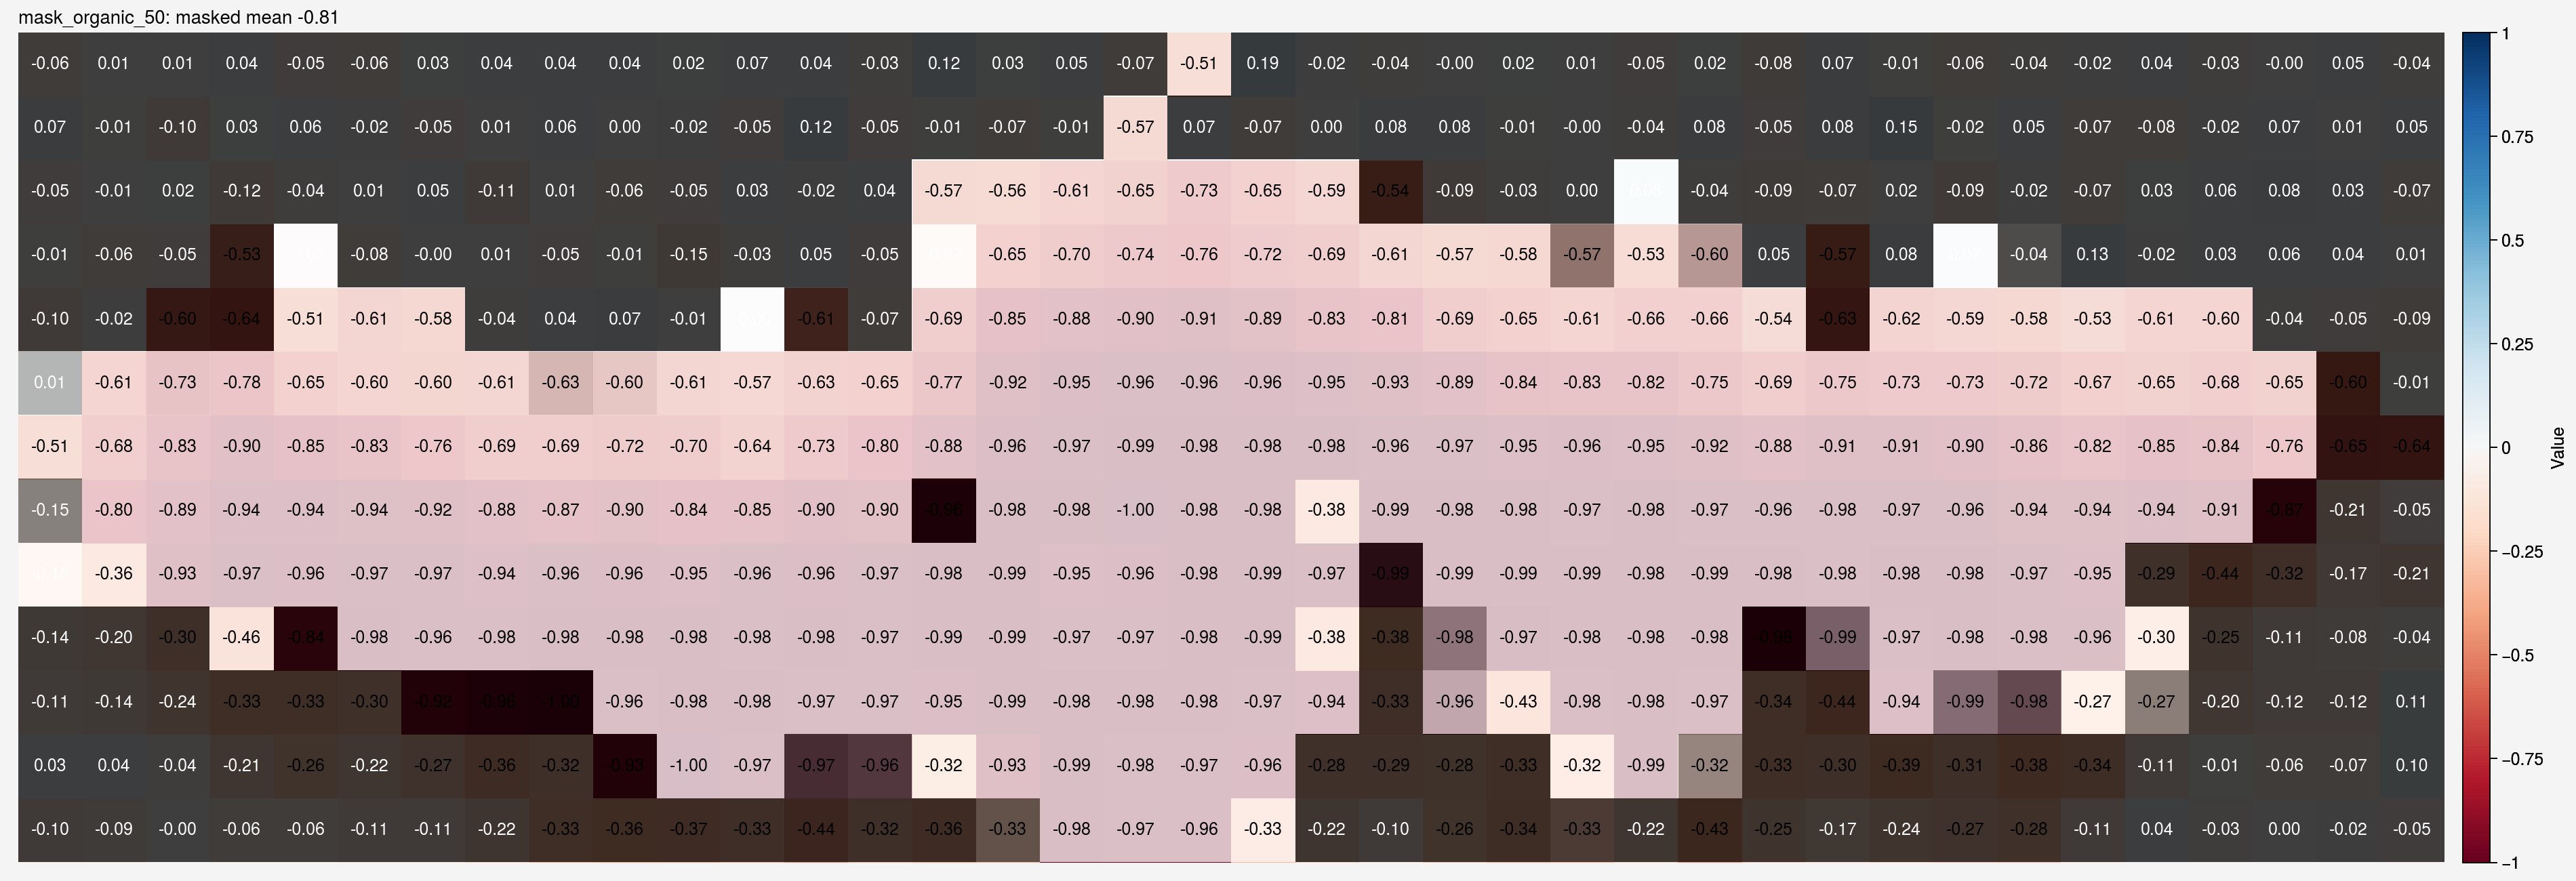

In [43]:

mean_ratios = {}

scenario_dir = os.path.join(user_folder,"models")
all_scenarios = [d.split(os.sep)[-1] for d in glob.glob(os.path.join(scenario_dir,"mask*"))]
scenario = "mask_organic_50"

scenario_obj = Project(scenario_dir, scenario, skyglow_file, epw_file, use_accelerad=True, 
                        rad_par_res='med')
scenario_obj.get_irradiance_results()
scenario_diffuse = pd.read_feather(scenario_obj.DIFFUSE_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]
scenario_direct = pd.read_feather(scenario_obj.DIRECT_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]

baseline_total = baseline_diffuse+baseline_direct
scenario_total = scenario_diffuse+scenario_direct


grid_data = pd.read_csv(baseline_obj.grid_file, header=None, sep=" ")

# calculate the base values for the metric
irrad_value = (scenario_total - baseline_total) / baseline_total

# load data to mask
df = pd.DataFrame({"x":grid_data[0],
            "y":grid_data[2],
            "g":irrad_value})

# Reshape the DataFrame into a 2D numpy array
# using pivot_table and values attributes
x_unique = sorted(df['x'].unique())
y_unique = sorted(df['y'].unique())
array_2d = df.pivot_table(index='y', columns='x', values='g').values

# mask the array cells underneath the mask and calculate the mean difference 
# array_2d[resized_image_array==1]

fig, axe = pplt.subplots(nrows=1,ncols=1,figsize=(38/2,13/2),share=False)
ax = axe[0]
# Create the heatmap
im = ax.heatmap(array_2d, cmap='RdBu',vmin=-1,vmax=1)
# Add labels for each cell

# Add colorbar
fig.colorbar(im, label='Value')

mask_type = scenario.split("_")[1] 
coverage = int(scenario.split("_")[2])
mask_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, mask_type,
                                coverage_factor=coverage/100)

# Resize the array to a lower dimension
resized_image_array = cv2.resize(mask_arr, (38, 13))
ax.imshow(resized_image_array, cmap='binary_r', zorder=1, alpha=0.75)


for i in range(array_2d.shape[0]):
    for j in range(array_2d.shape[1]):
        value = array_2d[i, j]
        if value>-0.25:
            c = 'white'
        else:
            c='k'
        ax.text(j, i, f'{value:.2f}', ha='center', va='center', color=c)


ratio_mean = np.mean(array_2d[resized_image_array==1]).round(2)
# Set title
ax.format(ltitle=f"{scenario}: masked mean {ratio_mean}",
        )
ax.axis(False)
print(ratio_mean)

In [133]:
irrad_value

0      0.894053
1      0.968497
2      1.070632
3      1.012667
4      1.002020
         ...   
489    1.047809
490    1.084772
491    1.070075
492    1.180741
493    0.990114
Name: 4332, Length: 494, dtype: float64

In [ ]:


mean_ratios = {}
median_ratios= {}
scenario_dir = os.path.join(user_folder,"models")
all_scenarios = [d.split(os.sep)[-1] for d in glob.glob(os.path.join(scenario_dir,"mask*"))]
for scenario in all_scenarios:
    scenario_obj = Project(scenario_dir, scenario, skyglow_file, epw_file, use_accelerad=True, 
                            rad_par_res='med')
    scenario_obj.get_irradiance_results()
    scenario_diffuse = pd.read_feather(scenario_obj.DIFFUSE_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]
    scenario_direct = pd.read_feather(scenario_obj.DIRECT_IRRAD_FILE)[good_cols].rename(columns=dict(zip(good_cols,new_cols))).loc[hoy]

    baseline_total = baseline_diffuse+baseline_direct
    scenario_total = scenario_diffuse+scenario_direct


    grid_data = pd.read_csv(baseline_obj.grid_file, header=None, sep=" ")

    # calculate the base values for the metric
    # irrad_value = (scenario_total - baseline_total) / baseline_total
    irrad_value = scenario_total / baseline_total

    # load data to mask
    df = pd.DataFrame({"x":grid_data[0],
                "y":grid_data[2],
                "g":irrad_value})

    # Reshape the DataFrame into a 2D numpy array
    # using pivot_table and values attributes
    x_unique = sorted(df['x'].unique())
    y_unique = sorted(df['y'].unique())
    array_2d = df.pivot_table(index='y', columns='x', values='g').values

    # mask the array cells underneath the mask and calculate the mean difference 
    # array_2d[resized_image_array==1]

    fig, axe = pplt.subplots(nrows=1,ncols=1,figsize=(38/2,13/2),share=False)
    ax = axe[0]
    # Create the heatmap
    im = ax.heatmap(array_2d, cmap='Inferno',vmin=0,vmax=1)
    
    # Add labels for each cell
    for i in range(array_2d.shape[0]):
        for j in range(array_2d.shape[1]):
            value = array_2d[i, j]
            if value>0.5:
                c = 'k'
            else:
                c='white'
            ax.text(j, i, f'{value:.2f}', ha='center', va='center', color=c)

    # Add colorbar
    fig.colorbar(im, label='Value')


    mask_type = "_".join(scenario.split("_")[1:len(scenario.split("_"))-1])
    coverage = int(scenario.split("_")[-1])
    mask_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, mask_type,
                                    coverage_factor=coverage/100)

    # Resize the array to a lower dimension
    resized_image_array = cv2.resize(mask_arr, (38, 13))
    ax.imshow(resized_image_array, cmap='binary_r', zorder=1, alpha=0.25)
    
    ratio_mean = np.mean(array_2d[resized_image_array==1]).round(2)
    ratio_median = np.median(array_2d[resized_image_array==1]).round(2)
    # Set title
    ax.format(ltitle=f"{scenario}: masked mean {ratio_mean} & median {ratio_median}",
            )
    ax.axis(False)

    fp = os.path.join("/Users/jmccarty/Nextcloud/Projects/17_framework/notebooks/ratios",f"{scenario}.png")
    fig.savefig(fp,dpi=144)
    mean_ratios[scenario] = ratio_mean
    median_ratios[scenario] = ratio_median

    pplt.close()
    
    


In [150]:
def fix_results(results):
    output = {"mask":[],
              "coverage":[],
              "factor":[]}
    for k,v in results.items():
        key_list = k.split("_")
        mask = "_".join(key_list[1:len(key_list)-1])
        output['mask'].append(mask)
        coverage = key_list[-1]
        output['coverage'].append(coverage)
        output['factor'].append(v)
        
    return output
    
pd.DataFrame(fix_results(mean_ratios)).to_csv("/Users/jmccarty/Nextcloud/Projects/17_framework/notebooks/ratios/ratio_factors_mean.csv")
pd.DataFrame(fix_results(median_ratios)).to_csv("/Users/jmccarty/Nextcloud/Projects/17_framework/notebooks/ratios/ratio_factors_median.csv")


In [ ]:
# load the mask array
mask_type = scenario.split("_")[1] 
coverage = int(scenario.split("_")[2])
mask_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, 'mask_columns',
                                coverage_factor=coverage/100)

# Resize the array to a lower dimension
resized_image_array = cv2.resize(mask_arr, (38, 13))

# plot the comparison
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(8, 4), share=False)

# Plotting the original image
axs[0].imshow(mask_arr, origin='lower')
axs[0].format(title='Original Image')

# Plotting the resized image
axs[1].imshow(resized_image_array, origin='lower')
axs[1].format(title='Resized Image')

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

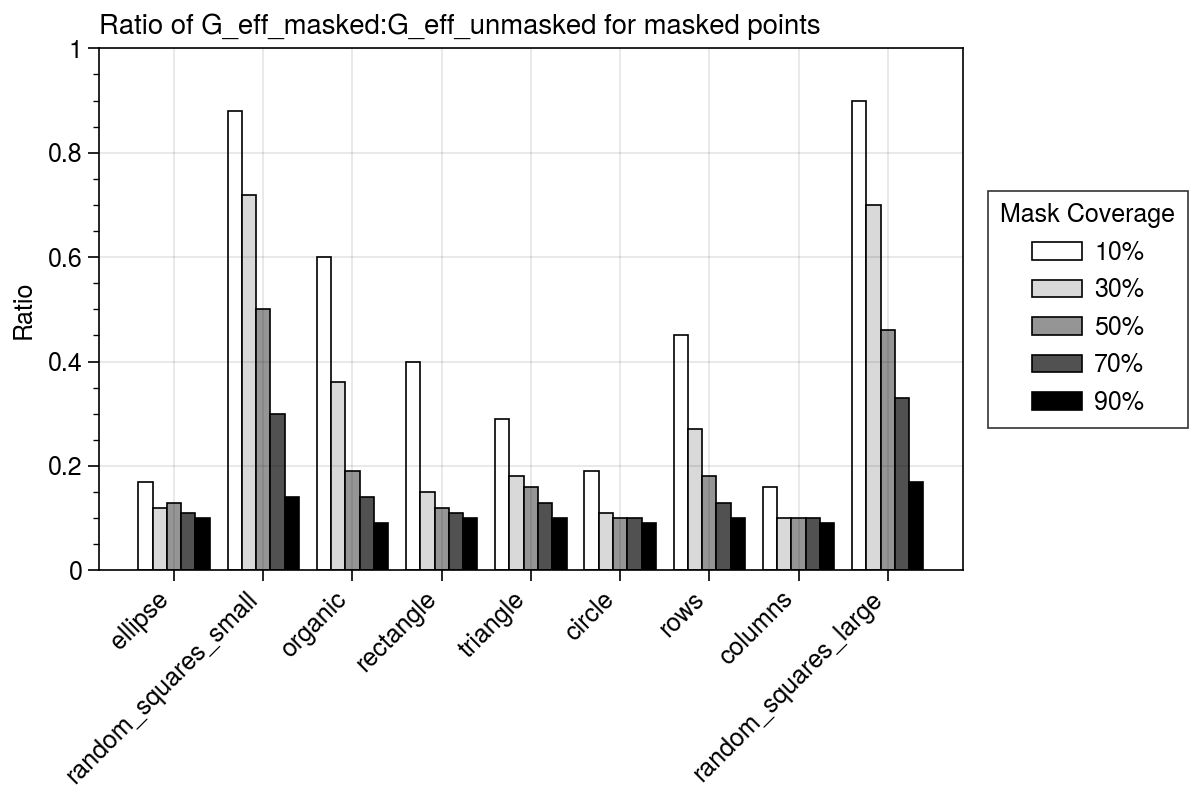

In [102]:
# after some manual work on the mean_ratios dict
mean_ratios_df = pd.read_csv("ratios/ratio_factors_mean.csv")

masks = mean_ratios_df['mask'].unique().tolist()

masks
mask_dict = {}
for mask in masks:
    mask_dict[mask] = {}
    mask_data = mean_ratios_df[mean_ratios_df['mask']==mask][['coverage','factor']]
    for coverage in [10,30,50,70,90]:
        mask_dict[mask][coverage] = mask_data[mask_data['coverage']==coverage]['factor'].values[0]


fig, axe = pplt.subplots(ncols=1,nrows=1,facecolor="white",figsize=(6,4))
plot_data = pd.DataFrame(mask_dict).transpose()
plot_data = plot_data.rename(columns=dict(zip(plot_data.columns,[str(c)+"%" for c in plot_data.columns])))
ax = axe[0]

ax.bar(plot_data,
       cycle='Greys', edgecolor='k')

ax.format(xrotation=45,ylabel="Ratio",
          ltitle="Ratio of G_eff_masked:G_eff_unmasked for masked points",
          ylim=(0,1))
fig.legend(loc='right', title="Mask Coverage", ncols=1)

In [105]:
plot_arr.shape

(275, 764)

In [108]:
np.sqrt(36) * .025

0.15000000000000002

### Linear

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

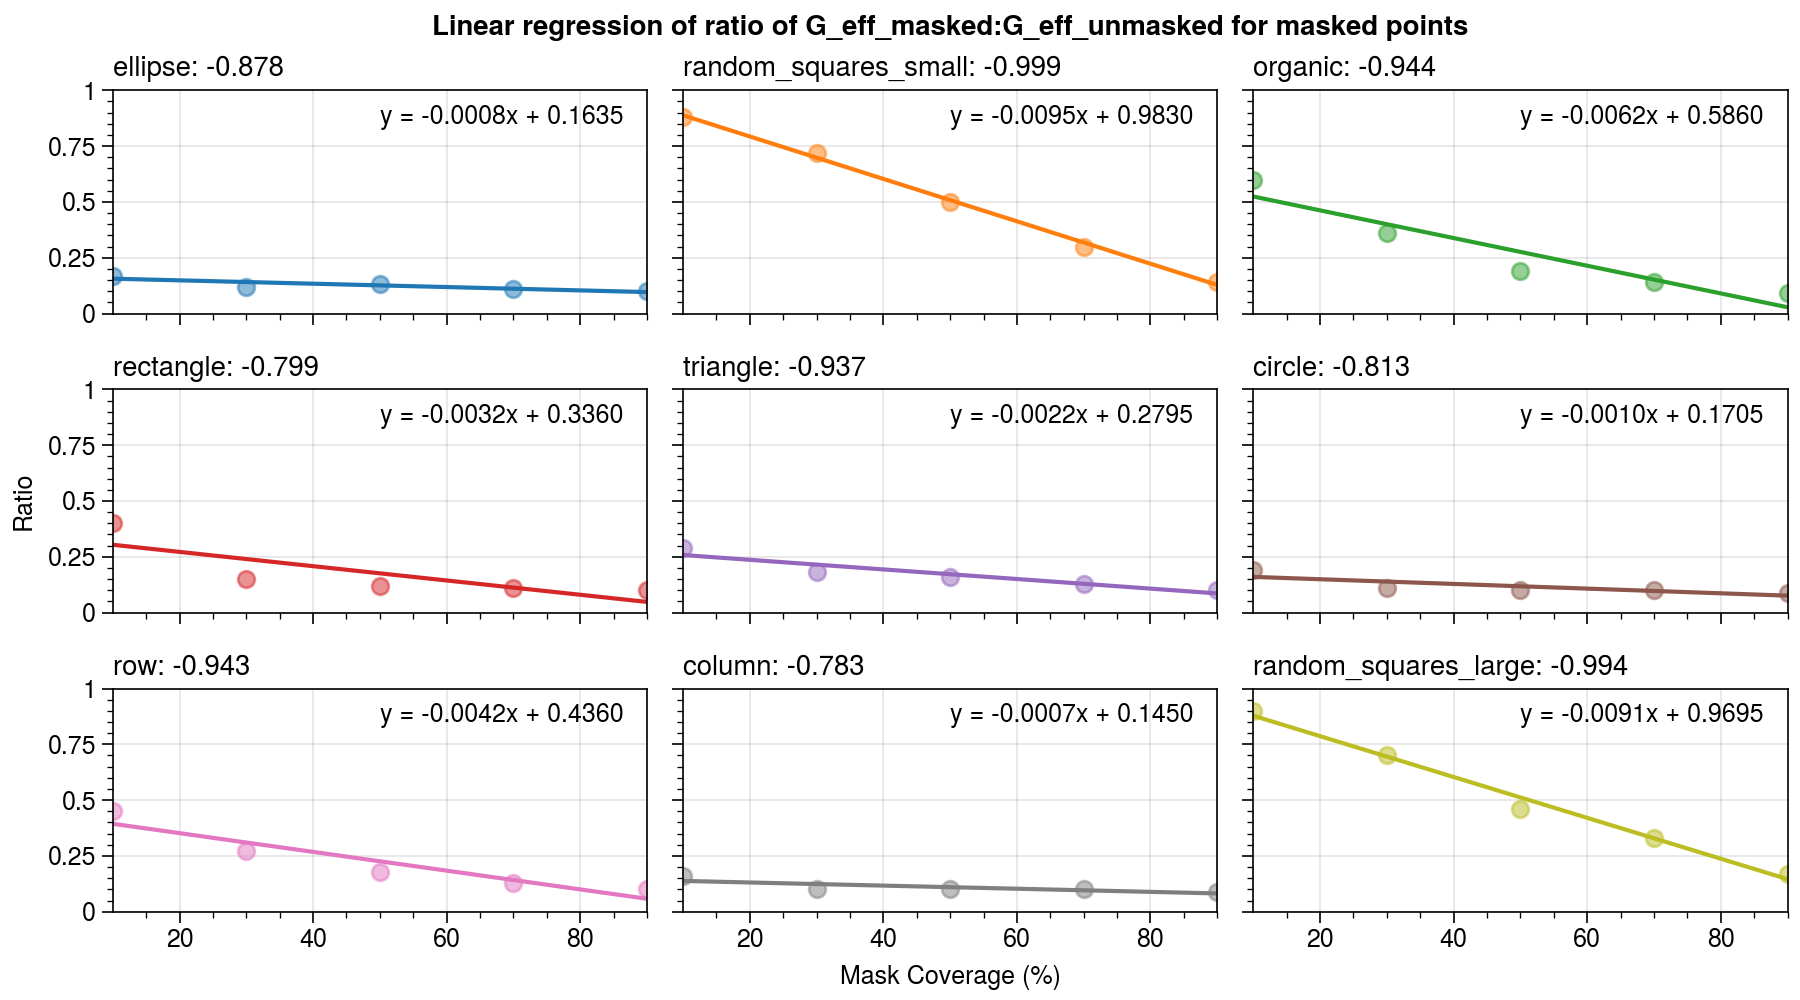

In [172]:

def build_equation_string(model):
    # Intercept
    intercept = model.intercept_
    # Coefficients
    coefficients = model.coef_
    # Constructing the equation string
    equation_terms = [f"{coeff:.4f}x " for i, coeff in enumerate(coefficients.flatten(), start=1)]
    equation = "y = " + " + ".join(equation_terms) + "+ {:.4f}".format(intercept[0])
    return equation

df = pd.DataFrame(mask_dict).transpose()

fig, axe = pplt.subplots(ncols=3,nrows=3,facecolor="white",figsize=(9,5))
base_colors = pplt.get_colors("tab10")

x = df.columns
x = np.array(x.tolist())
new_x = np.arange(10,91,1).reshape(-1,1)
scores = []
models = {}
for n,idx in enumerate(df.index):
    ax = axe[n]
    y = df.loc[idx]
    # y[0] = 0
    # y[100] = 1 
    
    y.sort_index(inplace=True)

    # res = stats.linregress(x,y)
    x_r = x.reshape(-1,1)
    y_r = y.to_numpy().reshape(-1,1)
    reg = LinearRegression().fit(x_r, y_r)
    new_y = reg.predict(new_x)
    
    score = stats.linregress(x,y).rvalue
    scores.append(score)
    
    models[idx.strip("mask_")] = reg
    color = pplt.to_rgba(base_colors[n])
    marker_color = [c for c in color]
    marker_color[3] = 0.5
    ax.plot(x, y, 'o', color=tuple(marker_color))
    ax.line(new_x, new_y, color=pplt.to_hex(color), label=idx)
    ax.format(ltitle=idx.strip("mask_")+": "+str(round(scores[n],3)),
          ylabel='Ratio',
          xlabel='Mask Coverage (%)',
          ylim=(0,1))
    ax.text(50,0.85,build_equation_string(reg))

handles = ax.get_legend_handles_labels()[0][1::2]
labels = ax.get_legend_handles_labels()[1][1::2]
new_labels = []
for n in range(len(labels)):
    new_labels.append(labels[n].strip("_")+"_"+str(round(scores[n],3)))

# fig.legend(handles, new_labels, loc="right",ncols=1, title='Shading Mask')
fig.suptitle("Linear regression of ratio of G_eff_masked:G_eff_unmasked for masked points")

with open('ratio_models_linear.pkl','wb') as f:
    pickle.dump(models,f)

In [93]:
intercept

array([0.8295])

#### Model Function

In [100]:

def calculate_ratio(mask_type, coverage):
    with open('ratio_models_linear.pkl','rb') as f:
        models = pickle.load(f)
    model = models[mask_type]    
    return np.clip(model.predict(np.array(coverage).reshape(-1,1)),0, 1)

calculate_ratio('triangle', 25
                )

array([[0.22575]])

### Multi Model

In [55]:


def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def exponential_function(x, a, b, c):
    return a * np.exp(-b * x) + c


def fit_models(x, y):
    # Scale x values to improve numerical stability
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x.reshape(-1, 1)).flatten()

    # Fit models and calculate MSE for each
    models_mse = {}

    # Linear model
    linear_model = LinearRegression()
    linear_model.fit(x_scaled.reshape(-1, 1), y)
    linear_pred = linear_model.predict(x_scaled.reshape(-1, 1))
    models_mse['Linear'] = (mean_squared_error(y, linear_pred), linear_model)

    # Exponential model (note: y values are already between 0 and 1, resulting in negative log-transformed values)
    y_log_transformed = np.log(y + 1e-6)  # Small constant to avoid log(0)
    exp_model = LinearRegression()
    exp_model.fit(x_scaled.reshape(-1, 1), y_log_transformed)
    exp_pred = np.exp(exp_model.predict(x_scaled.reshape(-1, 1)))
    models_mse['Exponential'] = (mean_squared_error(y, exp_pred), exp_model)

    # Logistic model with adjusted initial guesses
    initial_guesses = [1, 1, np.median(x_scaled)]  # Assuming L close to 1, and x0 within the range of x values
    bounds = ([0, 0, np.min(x_scaled)], [1, np.inf, np.max(x_scaled)])  # Constraining L between 0 and 1
    try:
        popt, _ = curve_fit(logistic_function, x_scaled, y, p0=initial_guesses, bounds=bounds, maxfev=10000)
        logistic_pred = logistic_function(x_scaled, *popt)
        logistic_mse = mean_squared_error(y, logistic_pred)
        logistic_model = (popt, logistic_function)
        models_mse['Logistic'] = (logistic_mse, logistic_model)
    except RuntimeError:
        models_mse['Logistic'] = (np.inf, None)

    # Determine the best model based on MSE
    best_model_name, (best_mse, best_model) = min(models_mse.items(), key=lambda x: x[1][0])

    return best_model_name, best_model, best_mse

# # Example usage
# x = np.linspace(0, 100, 100)  # Example x values ranging from 0 to 100
# y = 1 / (1 + np.exp(-0.1*(x-50)))  # Example y values using a logistic function for demonstration

# best_model_name, best_model, best_mse = fit_models(x, y)
# print(f"Best model: {best_model_name} with MSE: {best_mse}")

# # Using the best model for prediction
# if best_model_name in ['Linear', 'Exponential']:
#     predictions = best_model.predict(x.reshape(-1, 1))
# elif best_model_name == 'Logistic':
#     popt, logistic_func = best_model
#     predictions = logistic_func(x, *popt)
    
# fig, axe = pplt.subplots()
# ax = axe[0]

# ax.line(x,y)


In [53]:
df = pd.DataFrame(mask_dict).transpose() * -1
df[0] = 0
df[100] = 1
df.sort_index(axis=1, inplace=True)

models_multi = {}

x = df.columns
x = x.to_numpy()
scores = []
models = {}
for idx in df.index:
    y = df.loc[idx]
    y.sort_index(inplace=True)
    y = np.clip(y.to_numpy(),0,1)

    best_model_name, best_model, mse = fit_models(x, y)
    print(f"Best model for {idx}: {best_model_name} with MSE: {mse}")
    x_predict = .5
    if best_model_name=='Logistic':
        metrics, best_model = best_model
        L, k, x0 = metrics[0], metrics[1], metrics[2]
        print(best_model(np.array([x_predict]).reshape(-1,1), L, k, x0))
        models_multi[idx] = (best_model_name, best_model, L, k, x0)
    else:
        print(best_model.predict(np.array([x_predict]).reshape(-1,1)))
        models_multi[idx] = (best_model_name, best_model)

NameError: name 'fit_models' is not defined

NameError: name 'models_multi' is not defined

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

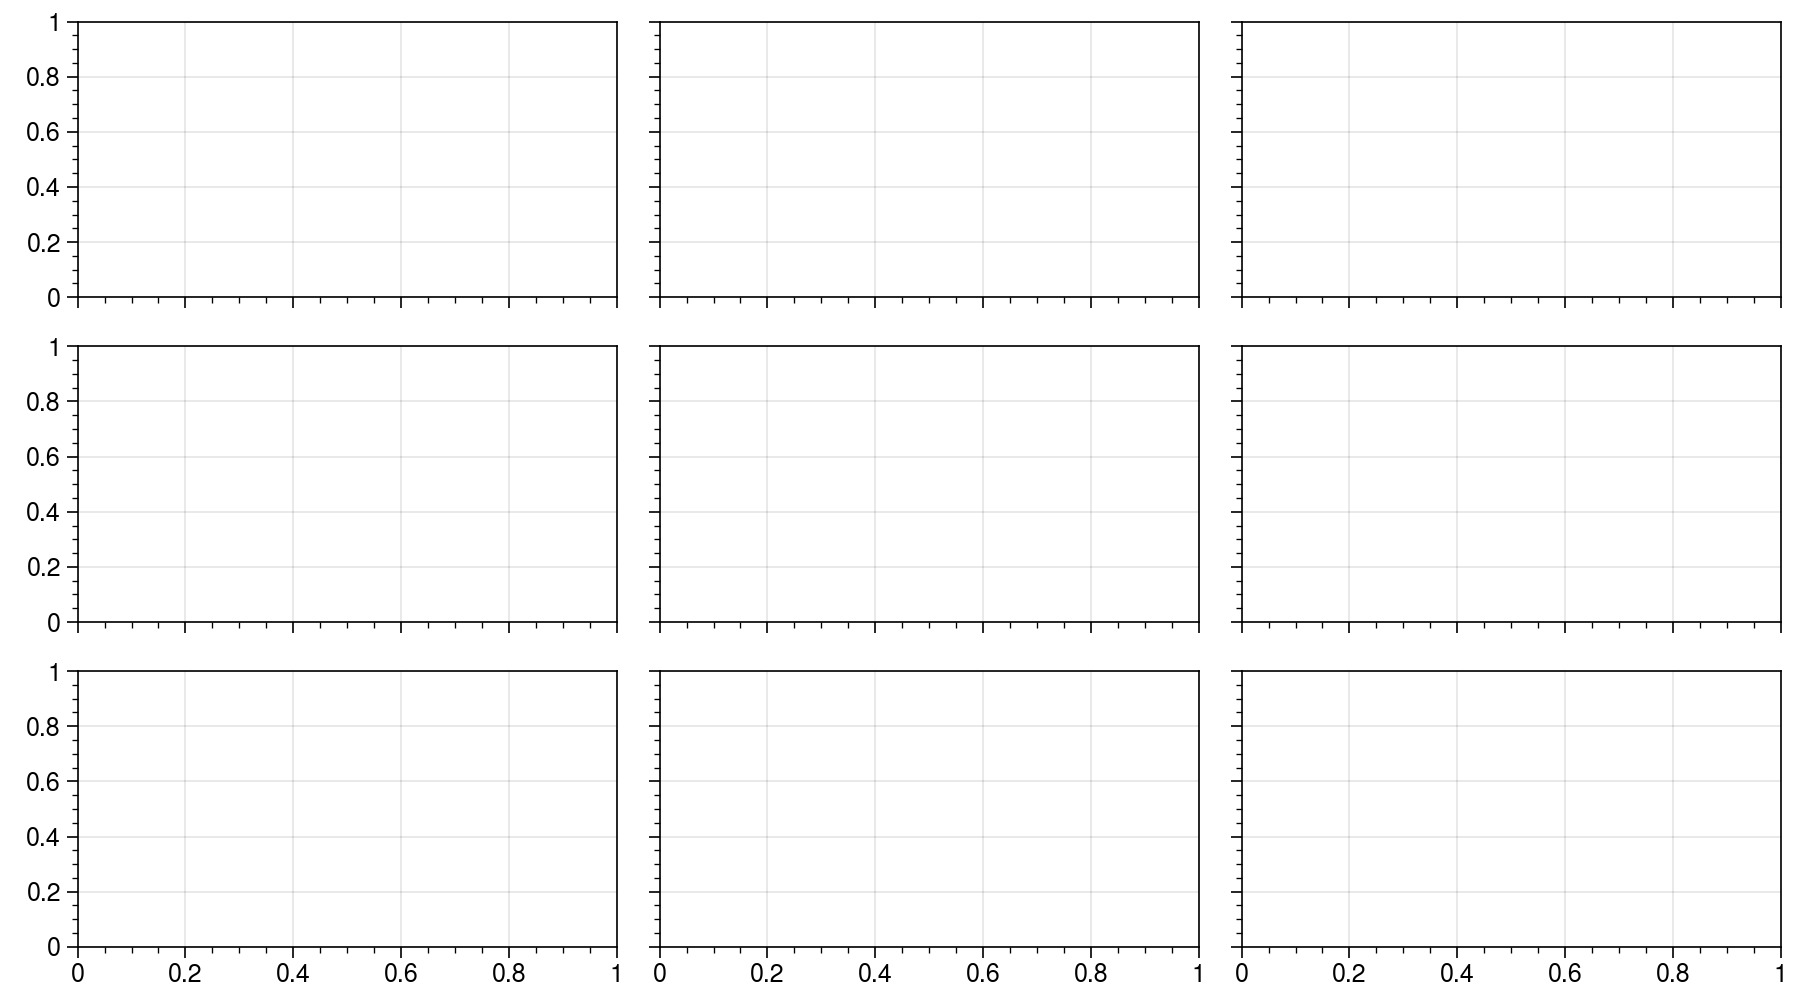

In [52]:
def deploy_model(model_dict, idx, x_predict):
    model = model_dict[idx]
    if model[0]=='Logistic':
        model_func = model[1]
        L, k, x0 = model[2], model[3], model[4]
        y_predict = model_func(x_predict, L, k, x0)
    else:
        model_func = model[1]
        y_predict = model_func.predict(x_predict)
    return y_predict


fig, axe = pplt.subplots(ncols=3,nrows=3,facecolor="white",figsize=(9,5))
base_colors = pplt.get_colors("tab10")
x = df.columns
x = x.to_numpy()
x_r = x.reshape(-1,1)
x_plot = np.arange(0,1,0.01).reshape(-1,1)
for n,idx in enumerate(df.index):
    ax = axe[n]
    color = pplt.to_rgba(base_colors[n])
    marker_color = [c for c in color]
    marker_color[3] = 0.5
    
    y = df.loc[idx]
    y.sort_index(inplace=True)
    y_r = y.to_numpy().reshape(-1,1)
    
    y_plot = deploy_model(models_multi, idx, x_plot)
    ax.plot(x, y, 'o', color=tuple(marker_color))
    ax.line(x_plot, y_plot, color=pplt.to_hex(color), label=idx)
    ax.format(ltitle=idx.strip("mask_"),
          ylabel='Ratio',
          xlabel='Mask Coverage (%)',
          ylim=(0,1))
    

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

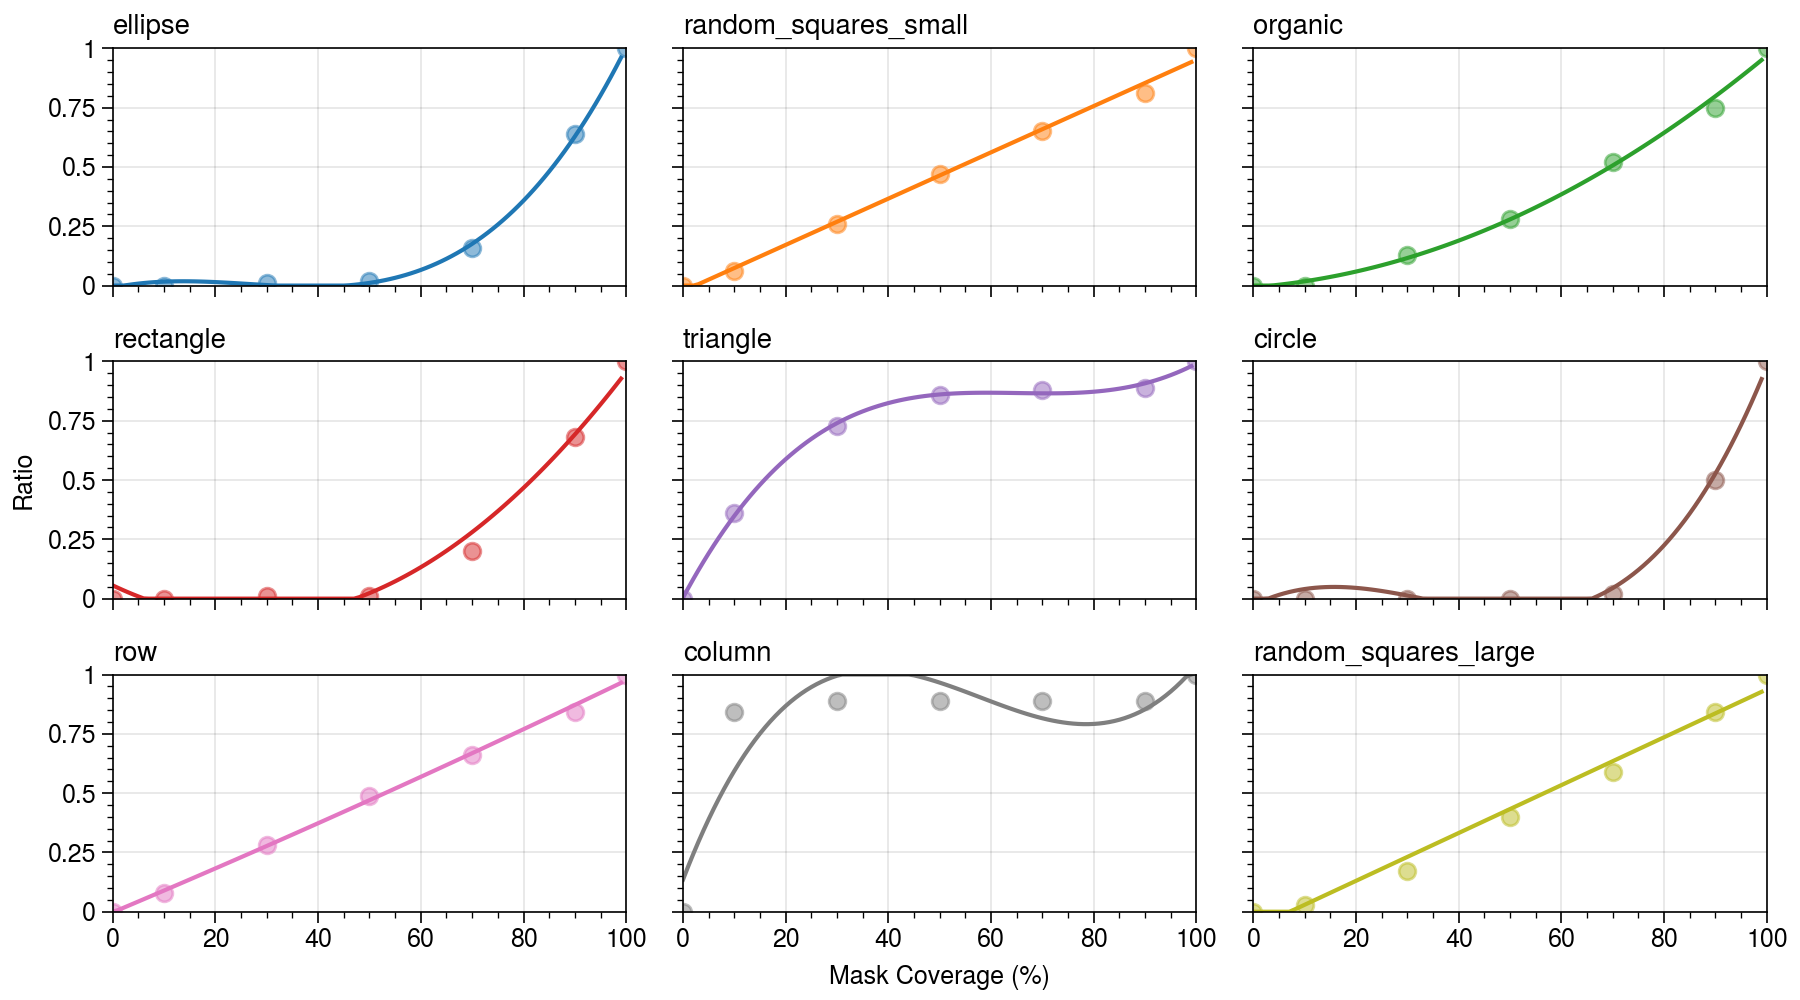

In [140]:


def fit_models_with_polynomial(x_train, y_train, x_predict, degree=2):
    # Polynomial Features with Linear Regression
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(x_train.reshape(-1, 1), y_train)
    poly_pred = polynomial_model.predict(x_predict.reshape(-1, 1))
    return poly_pred
df = pd.DataFrame(mask_dict).transpose() * -1
df[0] = 0
df[100] = 1
df.sort_index(axis=1, inplace=True)

fig, axe = pplt.subplots(ncols=3,nrows=3,facecolor="white",figsize=(9,5))
base_colors = pplt.get_colors("tab10")

degree_dict = {"ellipse":3, "random_squares_small":1, "organic":2, "rectangle":2,
               "triangle":3, "circle":3, "rows":2, "columns":3,"random_squares_large":1}

for n, idx in enumerate(df.index):
    ax = axe[n]
    x = df.loc[idx].index.to_numpy()
    y = df.loc[idx].values
    x_predict = np.arange(0, 100, 1)
    y_predict = np.clip(fit_models_with_polynomial(x, y, x_predict, degree_dict[idx]),
                        0 , 1)
    
    color = pplt.to_rgba(base_colors[n])
    marker_color = [c for c in color]
    marker_color[3] = 0.5
    ax.plot(x, y, 'o', color=tuple(marker_color))
    ax.line(x_predict, y_predict, color=pplt.to_hex(color), label=idx)
    ax.format(ltitle=idx.strip("mask_"),
          ylabel='Ratio',
          xlabel='Mask Coverage (%)',
          ylim=(0,1))



linear


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

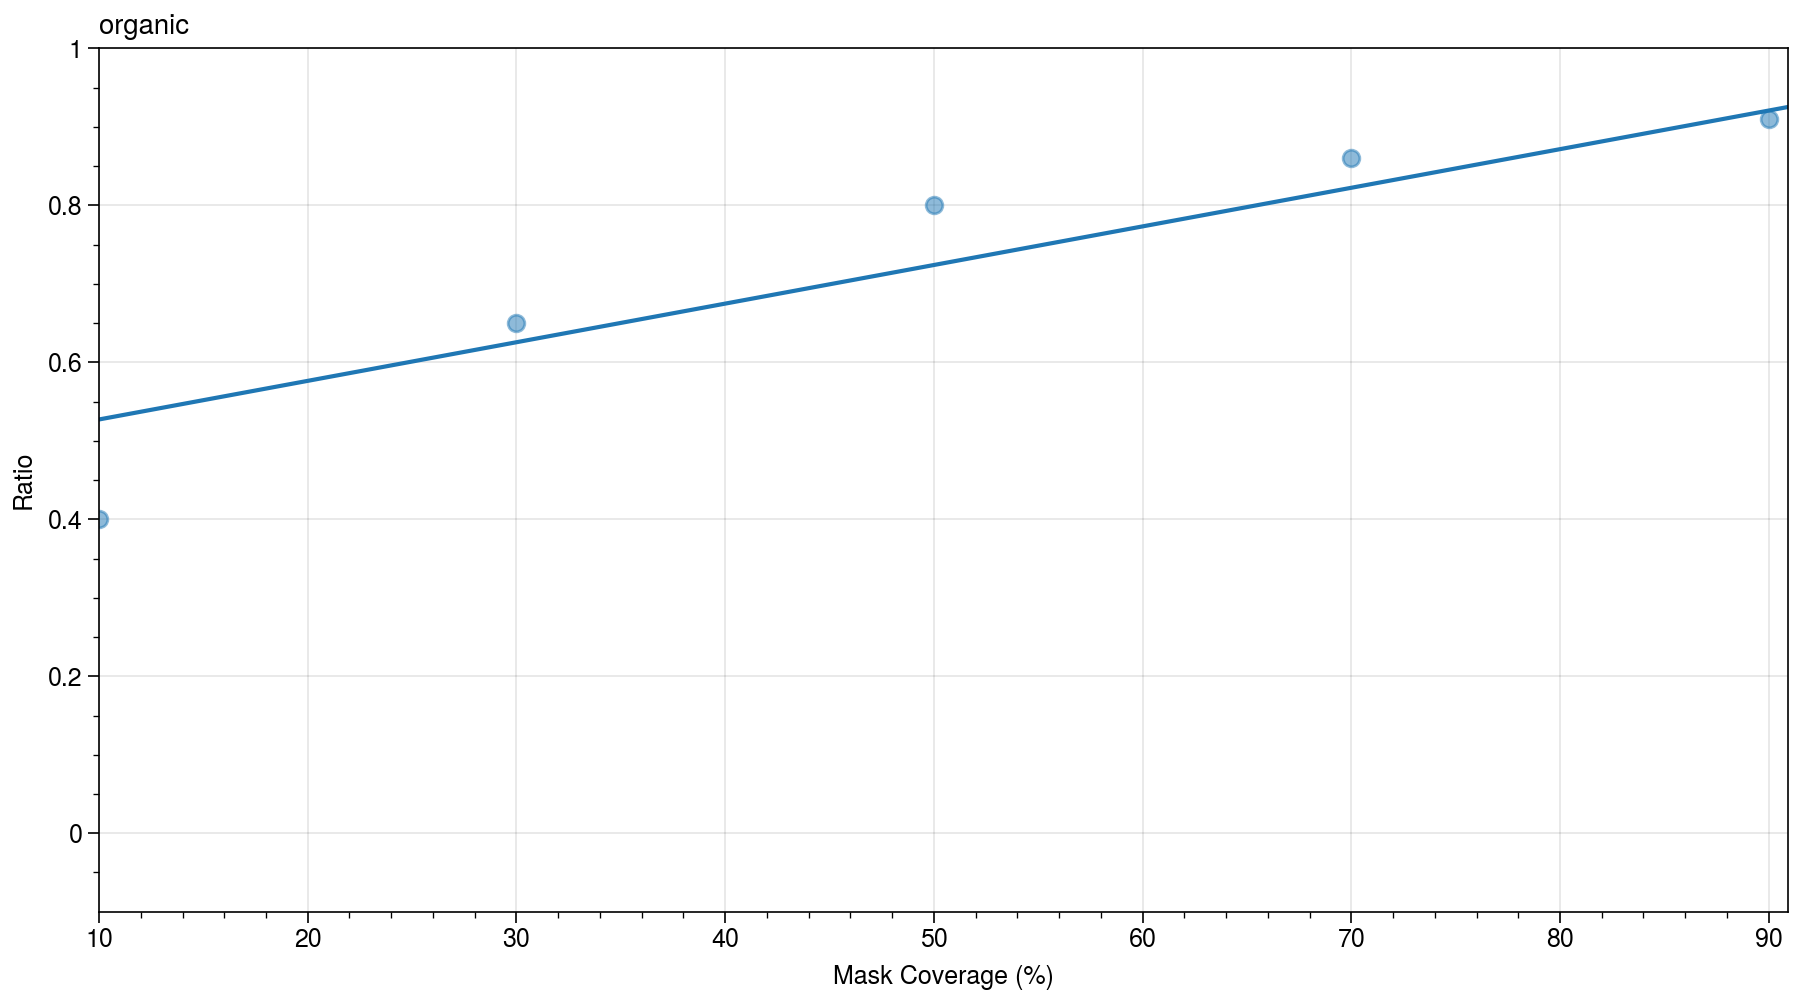

In [77]:
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def exponential_function(x, a, b, c):
    return a * np.exp(b * x) + c

def exponential_inverse_function(x, a, b, c):
    return a * np.exp(-b * x) + c

def fit_models_with_polynomial(x_train, y_train, x_predict, degree=2):
    # Polynomial Features with Linear Regression
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(x_train.reshape(-1, 1), y_train)
    poly_pred = polynomial_model.predict(x_predict.reshape(-1, 1))
    return poly_pred


df = pd.DataFrame(mask_dict).transpose() * -1
# df[0] = 0
# df[100] = 1
df.sort_index(axis=1, inplace=True)

fig, axe = pplt.subplots(ncols=1,nrows=1,facecolor="white",figsize=(9,5))
base_colors = pplt.get_colors("tab10")

idx = 'organic'
curve = 'linear'

ax = axe[0]
x = df.loc[idx].index.to_numpy()
y = np.clip(df.loc[idx].values, 0 ,1)

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1)).flatten()
x_predict = np.arange(.1, .91, 0.001)
if curve=='logistic':
        print("logistic")
        initial_guesses = [1, 1, np.median(x_scaled)]  # Assuming L close to 1, and x0 within the range of x values
        bounds = ([0, 0, np.min(x_scaled)], [1, np.inf, np.max(x_scaled)])  # Constraining L between 0 and 1
        popt, _ = curve_fit(logistic_function, x_scaled, y, 
                        p0=initial_guesses, bounds=bounds, maxfev=10000)
        pred_y = logistic_function(x_predict, *popt)
elif curve=='exponential':
        print("exponential")
        popt, pcov = curve_fit(exponential_function, x_scaled, y)
        pred_y = exponential_function(x_predict, *popt)
elif curve=='exponential_inverse':
        print("exponential_inverse")
        popt, pcov = curve_fit(exponential_function, x_scaled, y)
        pred_y = exponential_inverse_function(x_predict, *popt)
elif curve=='linear':
        print("linear")
        reg = LinearRegression().fit(x_scaled.reshape(-1,1), y.reshape(-1,1))
        pred_y = reg.predict(x_predict.reshape(-1,1))
elif curve=='polynomial':
        print("polynomial")
        pred_y = np.clip(fit_models_with_polynomial(x_scaled, 
                                                       y, 
                                                       x_predict, 
                                                       degree=2),
                                0 , 1)
else:
        print("curve not right")
color = pplt.to_rgba(base_colors[n])
marker_color = [c for c in color]
marker_color[3] = 0.5
ax.plot(x, y, 'o', color=tuple(marker_color))
ax.line(x_predict*100, pred_y, color=pplt.to_hex(color), label=idx)
ax.format(ltitle=idx.strip("mask_"),
        ylabel='Ratio',
        xlabel='Mask Coverage (%)',
        ylim=(-0.1,1))

## Plot Grid

Text(0.5, 1.0, 'mask_columns_10')

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

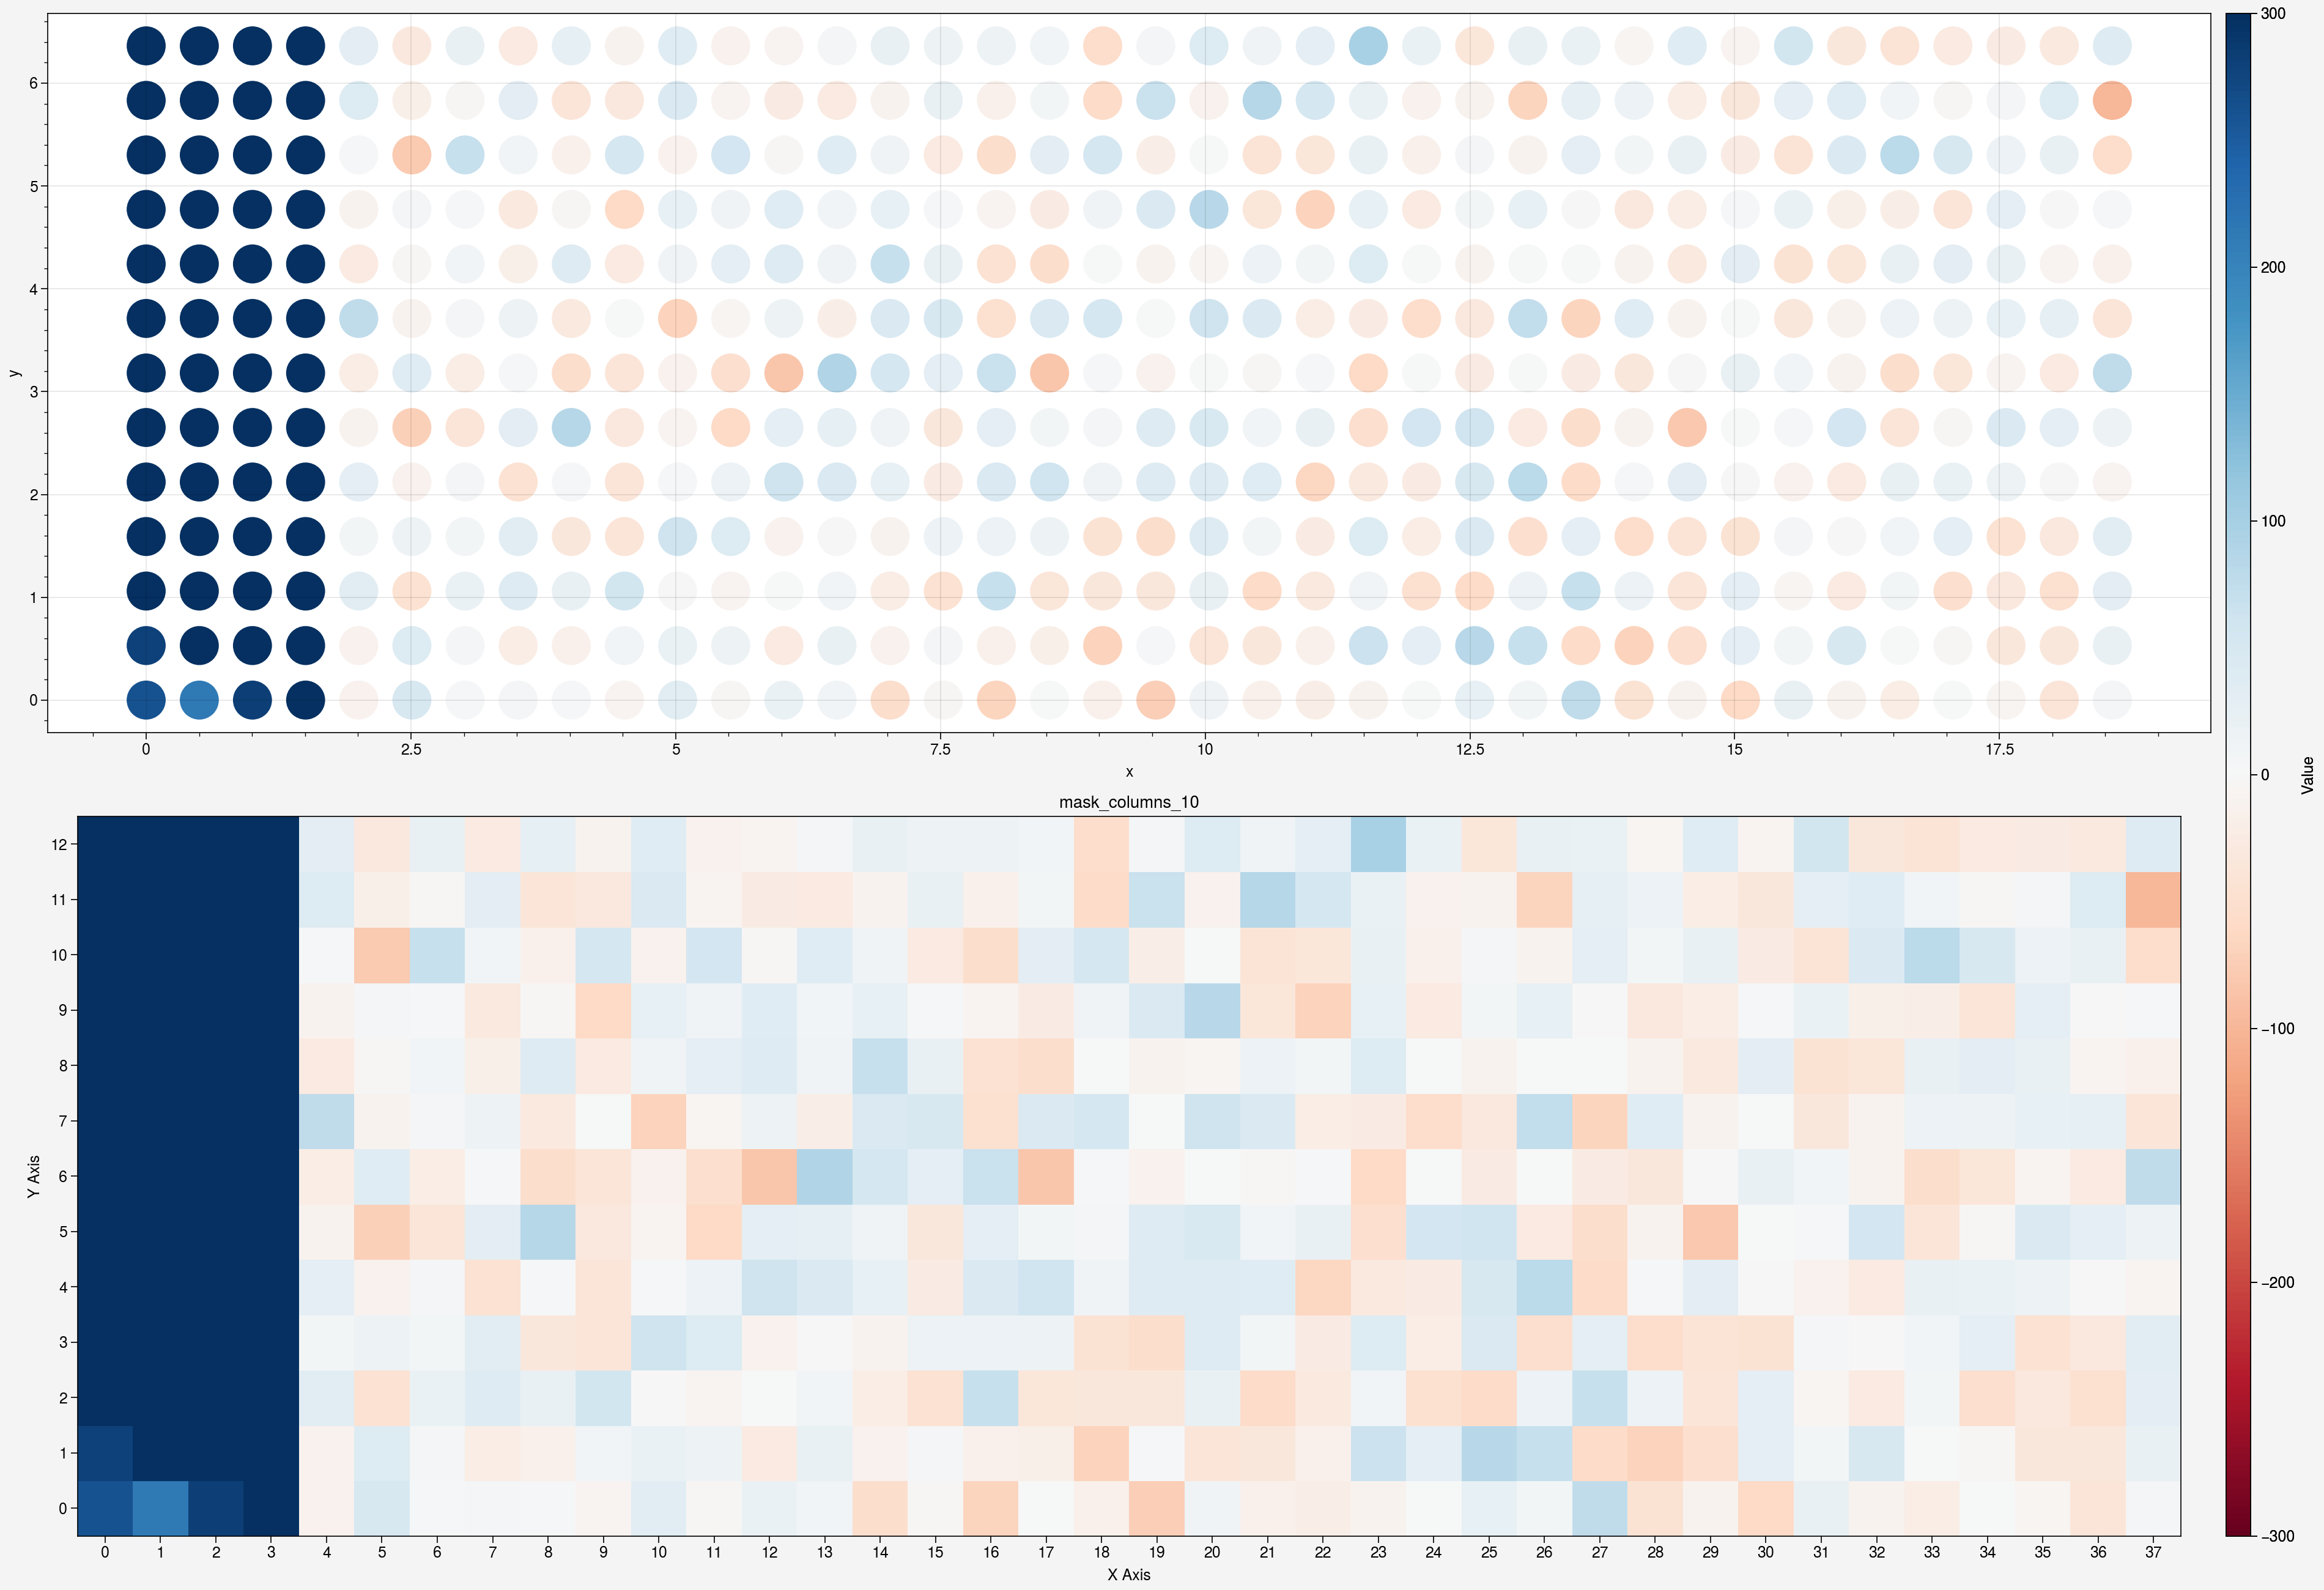

In [154]:
# Create a figure and axis using proplot
hoy = 4332
grid_data = pd.read_csv(scenario_obj.grid_file, header=None, sep=" ")
# df_baseline = pd.DataFrame({"x":grid_data[0],
#               "y":grid_data[2],
#               "g":baseline_diffuse+baseline_direct})

# df_scenario = pd.DataFrame({"x":grid_data[0],
#               "y":grid_data[2],
#               "g":scenario_diffuse+scenario_direct})

df = pd.DataFrame({"x":grid_data[0],
              "y":grid_data[2],
              "g":(baseline_diffuse+baseline_direct)-(scenario_diffuse+scenario_direct)})

# Reshape the DataFrame into a 2D numpy array
# using pivot_table and values attributes
x_unique = sorted(df['x'].unique())
y_unique = sorted(df['y'].unique())
array_2d = df.pivot_table(index='y', columns='x', values='g').values

fig, axe = pplt.subplots(nrows=2,ncols=1,figsize=(38/2,13/2*2),share=False)
ax = axe[0]
r = ax.scatter(x = df['x']-df['x'].min(), y = df['y']-df['y'].min(), cmap='RdBu',vmin=-300,vmax=300, s=500, color=df['g'],
            #    vmin=0
               )
# fig.colorbar(r, loc='right')

ax = axe[1]
# Create the heatmap
im = ax.heatmap(array_2d, cmap='RdBu',vmin=-300,vmax=300)

# Add colorbar
fig.colorbar(im, label='Value')

# Set axis labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

# Set title
ax.set_title(scenario)


# Writing Shading Masks

In [99]:
shape_library = ['rows', 'columns', 'rectangle', 'triangle', 'circle', 'ellipse', 'random_squares_small','random_squares_large', 'organic']
coverage_range = np.arange(10,91,5)

shading_dict = {}

for shape in shape_library:
    shading_dict[shape] = {}
    for coverage_factor in coverage_range:
        plot_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, shape,
                                        coverage_factor=coverage_factor)
        shading_dict[shape][coverage_factor] =  plot_arr
    
with open("/Users/jmccarty/Desktop/sm.pickle","wb") as fp:
    pickle.dump(shading_dict, fp)

Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new polygon iteratively.
Size not achieved. Making new p

0.4500237981913375


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

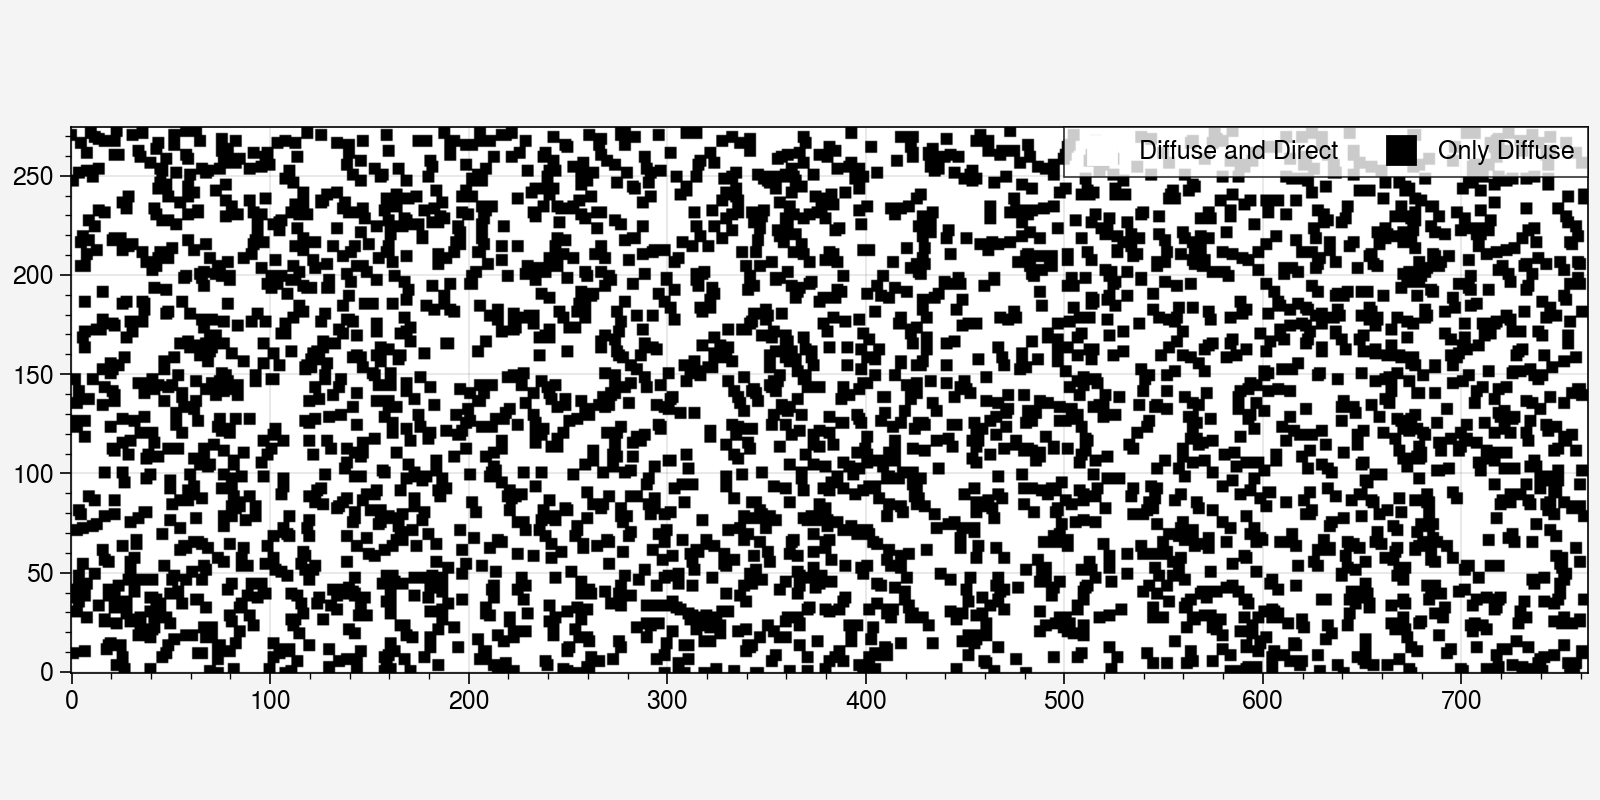

In [32]:
plot_arr = sm.load_shading_masks()['random_squares_small'][45]

a, b = plot_arr.shape
print(np.sum(plot_arr) / (a*b))
# plot_arr[0:100, 0:100] = 1


fig, ax = pplt.subplots(figsize=(8,4))
ax.imshow(plot_arr, cmap="gray_r", vmin=0, vmax=1, origin="lower")

all_irrad = Line2D([], [], color='white', marker='s', linestyle='None',
                #    markeredgewidth=0.2, markeredgecolor='grey',
                          markersize=10)
diffuse_irrad = Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=10)

custom_lines = [all_irrad, diffuse_irrad]

ax.legend(custom_lines, ['Diffuse and Direct', 'Only Diffuse'], frameon=True, facecolor='lightgrey')

[ 24667  92861  21295 ... 131932 146867 121958]
Coverage not achieved due to overlap. Using a while loop to iteratively complete the coverage target.
0.05008091385054736


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

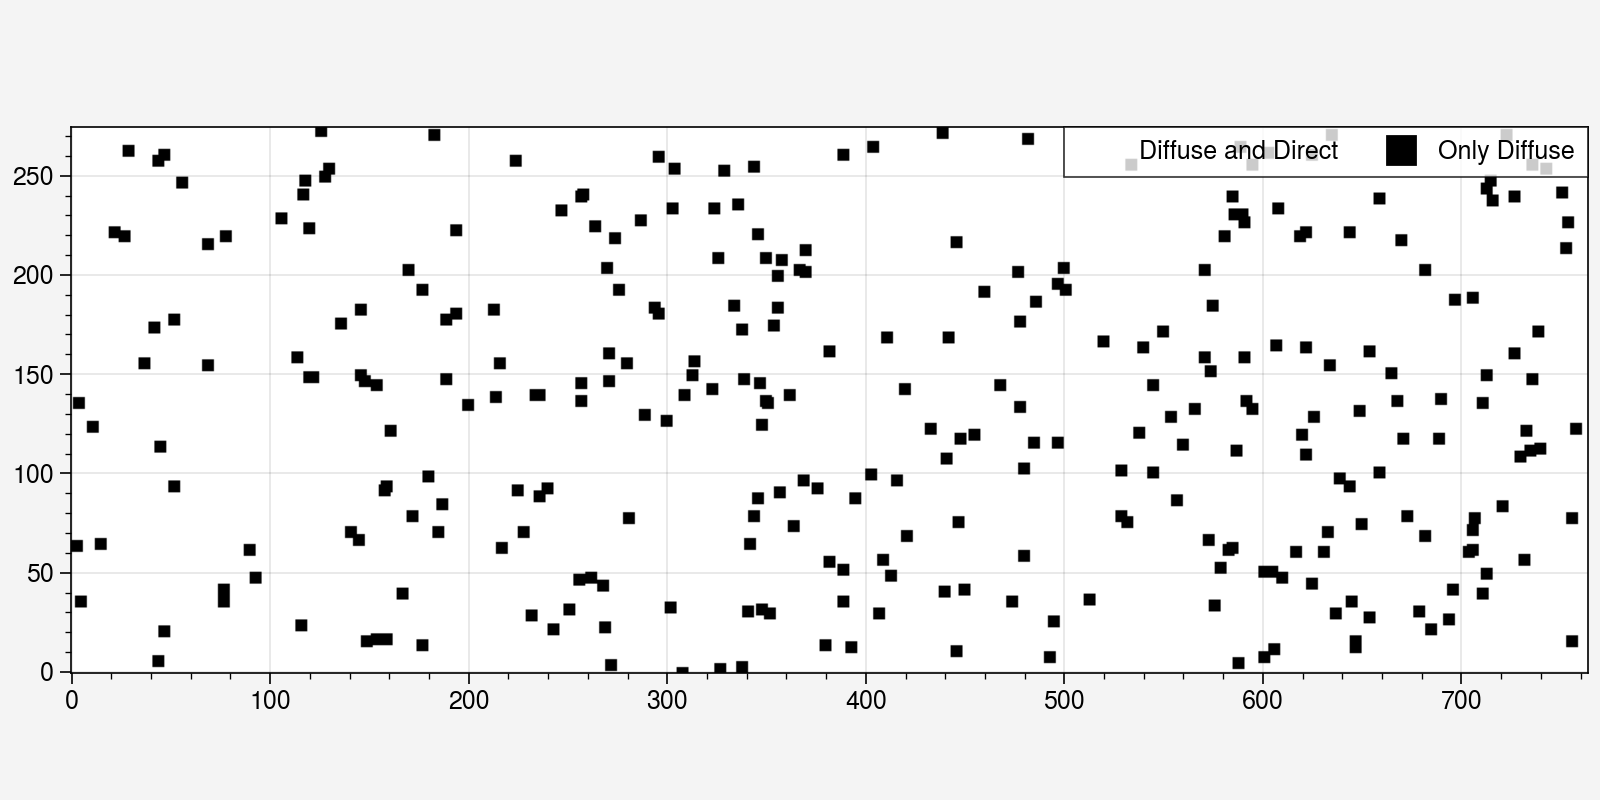

In [97]:
plot_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, "random_squares_small", .05)
# plot_arr = sm.load_shading_masks()['random_squares_small'][15]

a, b = plot_arr.shape
print(np.sum(plot_arr) / (a*b))
# plot_arr[0:100, 0:100] = 1


fig, ax = pplt.subplots(figsize=(8,4))
ax.imshow(plot_arr, cmap="gray_r", vmin=0, vmax=1, origin="lower")

all_irrad = Line2D([], [], color='white', marker='s', linestyle='None',
                #    markeredgewidth=0.2, markeredgecolor='grey',
                          markersize=10)
diffuse_irrad = Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=10)

custom_lines = [all_irrad, diffuse_irrad]

ax.legend(custom_lines, ['Diffuse and Direct', 'Only Diffuse'], frameon=True, facecolor='lightgrey')

[179684 125053 167271 ... 131932 146867 121958]
Coverage not achieved due to overlap. Using a while loop to iteratively complete the coverage target.
0.15002379819133746


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

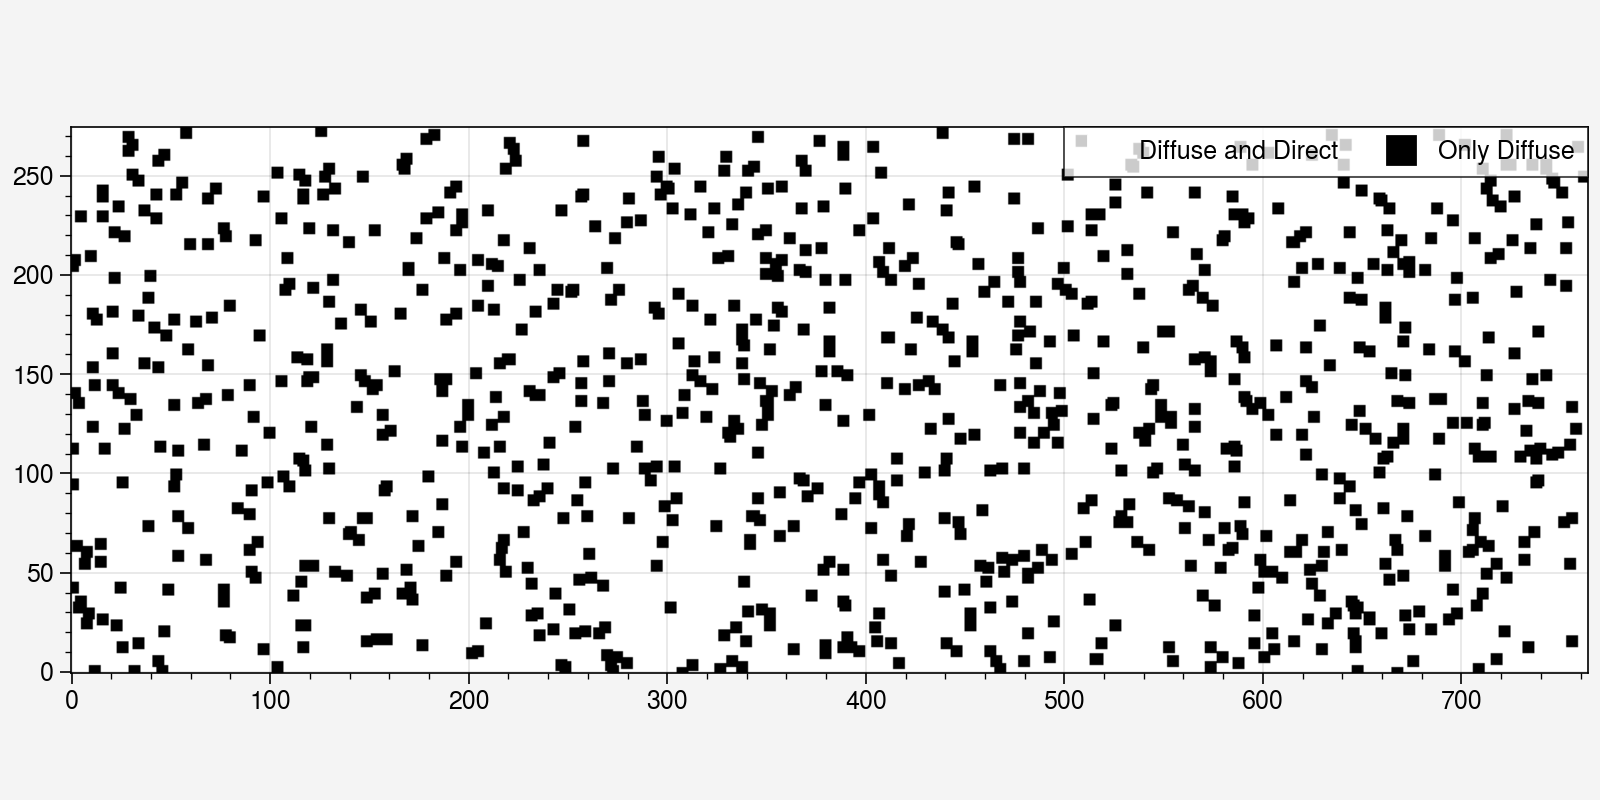

In [98]:
plot_arr = sm.generate_mask_arr(sensor_pts_xyz_arr, "random_squares_small", .15)
# plot_arr = sm.load_shading_masks()['random_squares_small'][15]

a, b = plot_arr.shape
print(np.sum(plot_arr) / (a*b))
# plot_arr[0:100, 0:100] = 1


fig, ax = pplt.subplots(figsize=(8,4))
ax.imshow(plot_arr, cmap="gray_r", vmin=0, vmax=1, origin="lower")

all_irrad = Line2D([], [], color='white', marker='s', linestyle='None',
                #    markeredgewidth=0.2, markeredgecolor='grey',
                          markersize=10)
diffuse_irrad = Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=10)

custom_lines = [all_irrad, diffuse_irrad]

ax.legend(custom_lines, ['Diffuse and Direct', 'Only Diffuse'], frameon=True, facecolor='lightgrey')